##### Importing necessary libraries

In [256]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for statistical data visualization

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


In [257]:
# setting pandas options for wider range display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading the data and EDA

In [258]:
leads = pd.read_csv('/content/Leads.csv')
leads.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.00,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.00,15.00,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.00,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.00,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.00,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.00,14.00,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.00,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.00,16.00,No,No,Email Opened


In [259]:
# inspecting the data types
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

- Here we see that majority of the variables are categorical and few are numaric

### checking for duplicate rows

In [260]:
# Print the shape of the DataFrame before removing columns with only one value
print(leads.shape)

# Remove columns with only one unique value
leads = leads.loc[:, leads.nunique() != 1]

# Print the shape of the DataFrame after removing columns with only one value
print(leads.shape)


(9240, 37)
(9240, 32)


5 columns have been removed which had only 1 value along all the rows

In [261]:
# dropping duplicate rows, if any
len(leads) - len(leads.drop_duplicates())

0

- We can see that there are no duplicate rows
- But now we shall have to look for missing values and its treatment

In [262]:
# primary check for presence of null values
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

- There are so many null values
- Let us have a visual approach to clear our understanding about the current data in hand

__Dropping of unnecessary columns__

- The columns named Asymmetrique Activity Score and Asymmetrique Activity Index are very much related.
- Asymmetrique Activity Index is nothing but bucketing of the values of Asymmetrique Activity Score
- And same applies for Asymmetrique Profile Score and Asymmetrique Profile Index too
- Let's examine this and drop Asymmetrique Activity Index and Asymmetrique Profile Index

In [263]:
# Create a new DataFrame 'table1' by selecting columns 'Asymmetrique Activity Score' and 'Asymmetrique Activity Index'
# Then, group the data by 'Asymmetrique Activity Index'
table1 = leads[['Asymmetrique Activity Score', 'Asymmetrique Activity Index']].groupby('Asymmetrique Activity Index')

# Calculate descriptive statistics for the grouped data using the 'describe' method
# This will compute statistics like count, mean, standard deviation, minimum, quartiles, and maximum
table1.describe()



Asymmetrique Activity Score                   \
                                                  count  mean  std   min   
Asymmetrique Activity Index                                                
01.High                                          821.00 16.44 0.51 16.00   
02.Medium                                       3839.00 14.13 0.72 13.00   
03.Low                                           362.00 11.29 0.93  7.00   

                                                     
                              25%   50%   75%   max  
Asymmetrique Activity Index                          
01.High                     16.00 16.00 17.00 18.00  
02.Medium                   14.00 14.00 15.00 15.00  
03.Low                      11.00 12.00 12.00 12.00

In [264]:
# Create a new DataFrame 'table2' by selecting columns 'Asymmetrique Profile Score' and 'Asymmetrique Profile Index'
# Then, group the data by 'Asymmetrique Profile Index'
table2 = leads[['Asymmetrique Profile Score', 'Asymmetrique Profile Index']].groupby('Asymmetrique Profile Index')

# Calculate descriptive statistics for the grouped data using the 'describe' method
# This will compute statistics like count, mean, standard deviation, minimum, quartiles, and maximum
table2.describe()



Asymmetrique Profile Score                         \
                                                count  mean  std   min   25%   
Asymmetrique Profile Index                                                     
01.High                                       2203.00 18.13 0.96 17.00 17.00   
02.Medium                                     2788.00 14.99 0.77 13.00 15.00   
03.Low                                          31.00 11.71 0.46 11.00 11.00   

                                              
                             50%   75%   max  
Asymmetrique Profile Index                    
01.High                    18.00 19.00 20.00  
02.Medium                  15.00 15.00 16.00  
03.Low                     12.00 12.00 12.00

- Now as we have confirmation (from the min vale and max value we get the range and they are seperated) from the above 2 tables that the Indexes and Score  are carring same information so one of each may be dropped, we can drop the Score columns

In [265]:
# Create a copy of the DataFrame 'leads' and assign it to 'leads_2'
leads_2 = leads.copy()

# Drop the specified columns ('Asymmetrique Profile Score' and 'Asymmetrique Activity Score') from 'leads_2'
# The 'axis=1' parameter specifies that columns should be dropped
leads_2 = leads_2.drop(['Asymmetrique Profile Score', 'Asymmetrique Activity Score'], axis=1)

Prospect ID has no significance in this analysis, so let us drop this

In [266]:
# Drop the column 'Prospect ID' from the DataFrame 'leads_2'
# The 'axis=1' parameter specifies that a column should be dropped
leads_2 = leads_2.drop('Prospect ID',axis=1)

__Now, let us define a fuction to check the data quality of a particular column__

In [267]:
def column_dataQuality(leads, column):
    # Print unique values of the specified column
    print(leads[column].unique(),'\n')

    # Calculate and print the percentage of null values in the specified column
    print('Null value percentage: ', leads[column].isna().sum() * 100 / len(leads[column]),'\n')

    # Print descriptive statistics of the specified column
    print(leads[column].describe())


In [268]:
column_dataQuality(leads_2,'What matters most to you in choosing a course')

['Better Career Prospects' nan 'Flexibility & Convenience' 'Other'] 

Null value percentage:  29.318181818181817 

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object


'What matters most to you in choosing a course' column has only 3 unique values and 29.3% missing value, so there is no need of keeping this

In [269]:
leads_2 = leads_2.drop('What matters most to you in choosing a course',axis=1)

In [270]:
column_dataQuality(leads_2,'How did you hear about X Education')

['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS'] 

Null value percentage:  23.885281385281385 

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object


This also has so many missing values, and it does not look so important factor. So, let us drop this

In [271]:
leads_2 = leads_2.drop('How did you hear about X Education',axis=1)

In [272]:
column_dataQuality(leads_2,'Specialization')

['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business'] 

Null value percentage:  15.562770562770563 

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object


In [273]:
column_dataQuality(leads_2,'Lead Quality')

['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance'] 

Null value percentage:  51.59090909090909 

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object


In [274]:
column_dataQuality(leads_2,'Tags')

['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized'] 

Null value percentage:  36.28787878787879 

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object


In [275]:
column_dataQuality(leads_2,'Last Activity')

['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam'] 

Null value percentage:  1.1147186147186148 

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


This column has 19 unique values and missing percentage is also not that high. So, let's not drop this

In [276]:
column_dataQuality(leads_2,'Country')

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia'] 

Null value percentage:  26.634199134199132 

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object


In [277]:
leads_2['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [278]:
# as we can see that most of the values are 'India', we can impute the missing values with 'India'
leads_2.loc[pd.isnull(leads_2['Country']), ['Country']] = 'India'
column_dataQuality(leads_2,'Country')

['India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates' 'United States'
 'Australia' 'United Kingdom' 'Bahrain' 'Ghana' 'Singapore' 'Qatar'
 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China' 'Canada'
 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia'] 

Null value percentage:  0.0 

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object


In [279]:
# Now we shall categorie it in 2 values, 'India' and 'Out side India'
leads_2['Country'] = leads_2['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads_2['Country'].value_counts()

Country
India            8953
Outside India     287
Name: count, dtype: int64

### Missing value and null value treatment

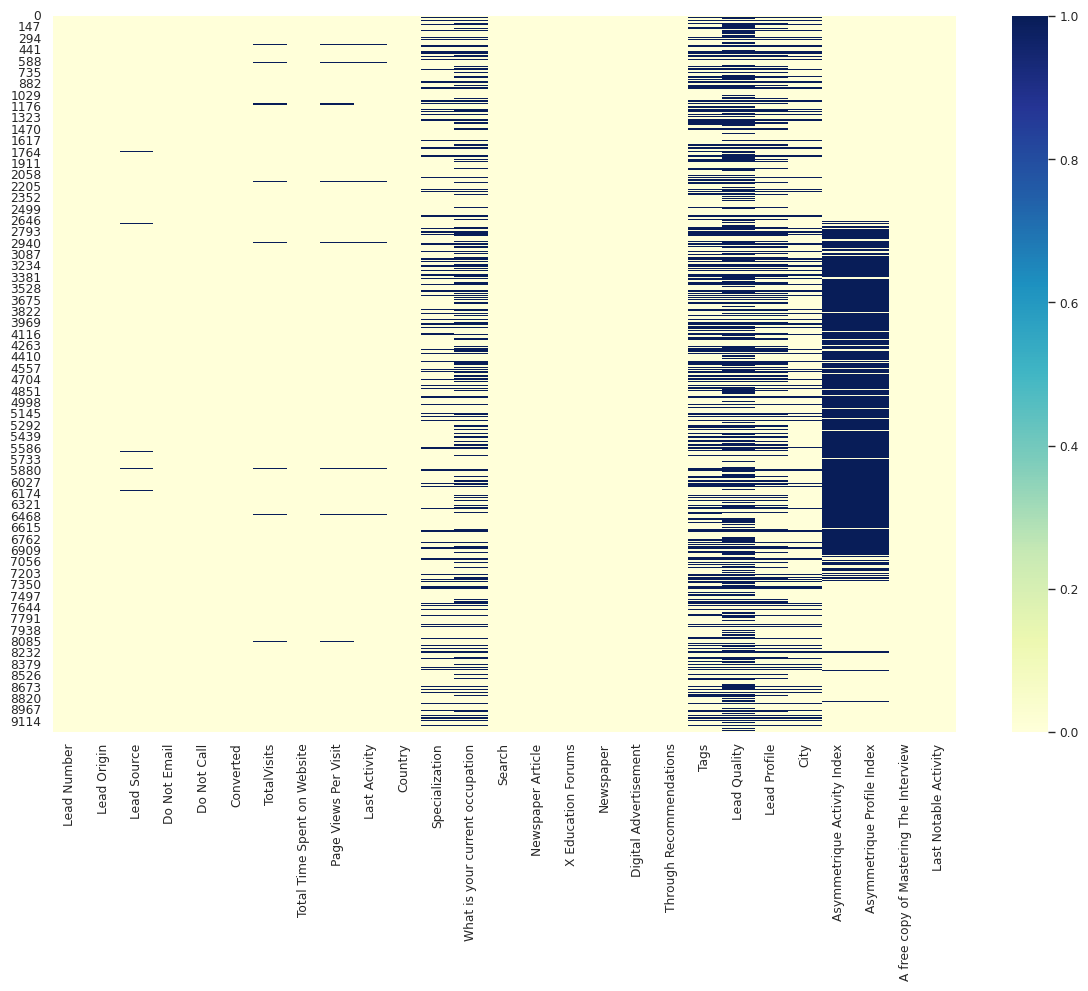

In [280]:
# Set up the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize missing values in the DataFrame 'leads_2'
# Missing values are represented as True in the DataFrame and are shown as colored cells in the heatmap
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')

# Adjust layout to make sure everything fits properly
plt.tight_layout()
plt.show()


There are many missing value present, so it needs to be treated

'Asymmetrique Profile Score' and 'Asymmetrique Activity Score' have so many missing values. Let us impute those with mean value as there is no chance of having outliers in this case

In [281]:
leads_2.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Country                                      2
Specialization                              19
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        26
Lead Quality                                 5
Lead Profile 

In [282]:
leads_2['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [283]:
# from the heat map we can see that 'Lead Source' has very less missing values.
#So let us impute them with 'Google' as it has occured many a times
leads_2.loc[pd.isnull(leads_2['Lead Source']), ['Lead Source']] = 'Google'

In [284]:
column_dataQuality(leads_2,'TotalVisits')

[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 

Null value percentage:  1.4826839826839826 

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64


In [285]:
# As it is taking integer values, and only 1.4 % missing values
# Let us impute this with median
leads_2['TotalVisits'].replace(np.NaN, leads_2['TotalVisits'].median(), inplace =True)

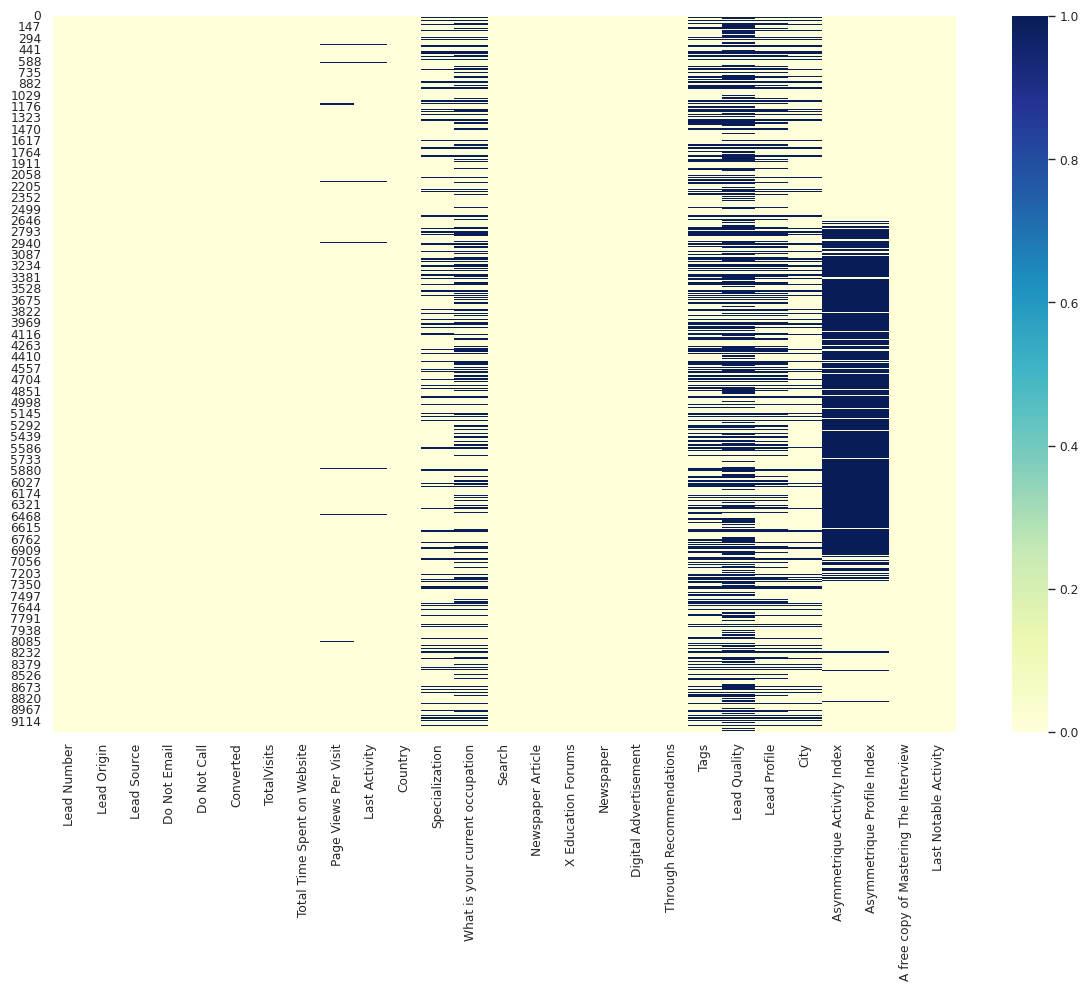

In [286]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [287]:
column_dataQuality(leads_2,'Page Views Per Visit')

[ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.
  3.75  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5
  3.8   1.19  3.82  2.83  1.93 11.5   2.08] 

Null value percentage:  1.4826839826839826 

count   9103.00
mean       2.36
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       55.00
Name: Page Views Per Visit, dtype: float64


In [288]:
leads_2['Page Views Per Visit'].mode()

0   0.00
Name: Page Views Per Visit, dtype: float64

In [289]:
# As the null value percentage is very less, let us impute these with mode
leads_2['Page Views Per Visit'].replace(np.NaN, 0.0, inplace =True)

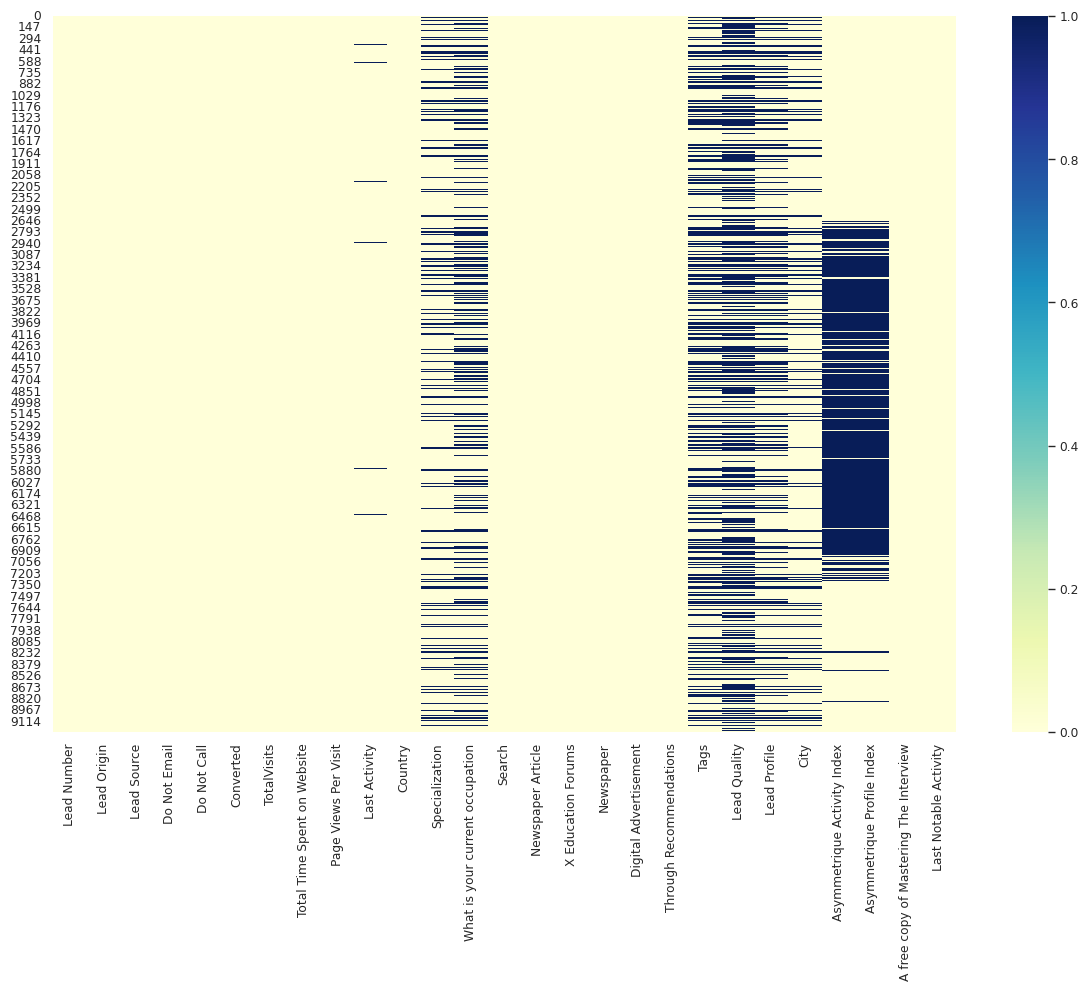

In [290]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [291]:
leads_2['Page Views Per Visit'].isna().sum()

0

In [292]:
# From the above distributions, it is seen that missing values for certain columns should not be filled with category values from above.
# Instead, all those missing values should be assigned a new value, such as 'Not_mentioned'.
# Similar action should be taken for the following columns:
# 'Last Activity', 'Tags', 'Specialization', 'What is your current occupation', 'Lead Quality',
# 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'.

lst_nm = ['Last Activity', 'Tags', 'Specialization', 'What is your current occupation', 'Lead Quality',
          'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [293]:
# Iterate through the list of column names
for i in range(0, len(lst_nm)):
    # Fill missing values in the current column with the string "not_mentioned"
    leads_2[lst_nm[i]].fillna("not_mentioned", inplace=True)


## Barplots to visualize population of different row values of categorical coloums.

In [294]:
# Define the list of columns to be plotted
lst_br1 = ['What is your current occupation', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']
lst_br = lst_br1
def plot_bar(leads):
    columns = lst_br
    plt.figure(figsize=(20, 40))

    # Loop through each column and create a subplot for bar plot
    for var in columns:
        plt.subplot(5, 2, columns.index(var) + 1)  # Subplot index starts from 1
        sns.barplot(y=var, x='Converted', palette='husl', data=leads, estimator=np.sum)
    plt.show()


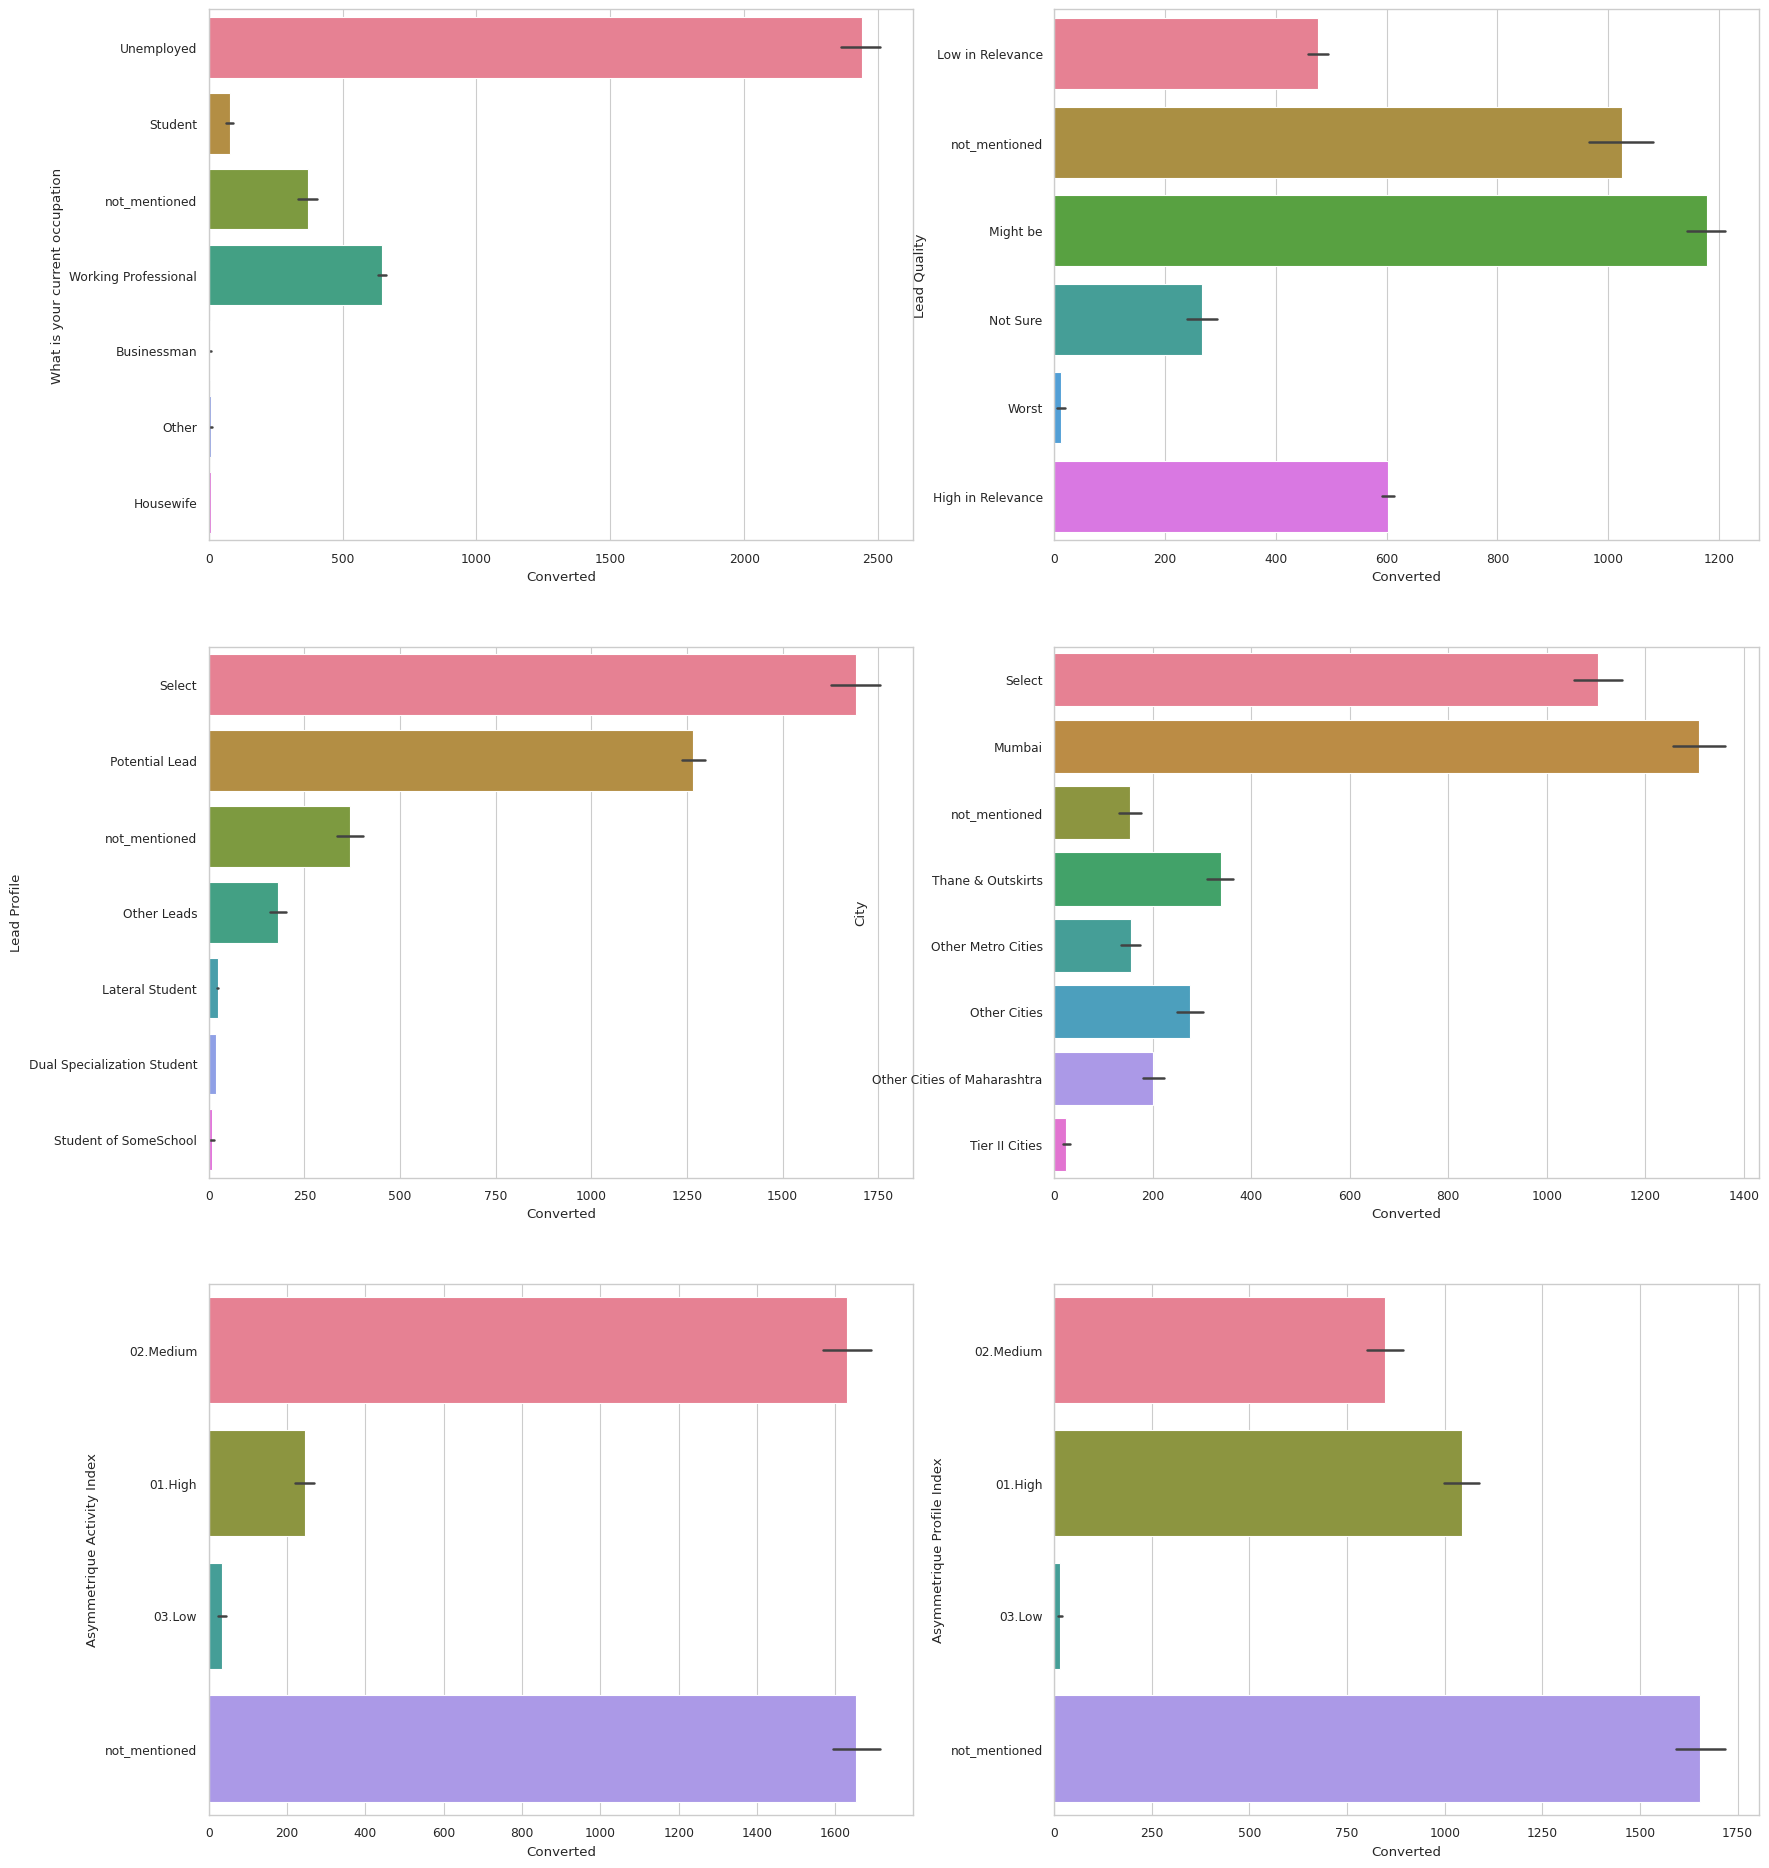

In [295]:
plot_bar(leads_2)

In [296]:
# in 'Lead profile' and 'City' have a value as 'Select'. This might have happened in the website where there  might be
#   a'Select' non mandatory drop downs option and few customer failed  to opt.So, those also are to be be replaced.
leads_2['Lead Profile'].replace('Select', 'not_mentioned', inplace =True)
leads_2['City'].replace('Select', 'not_mentioned', inplace =True)

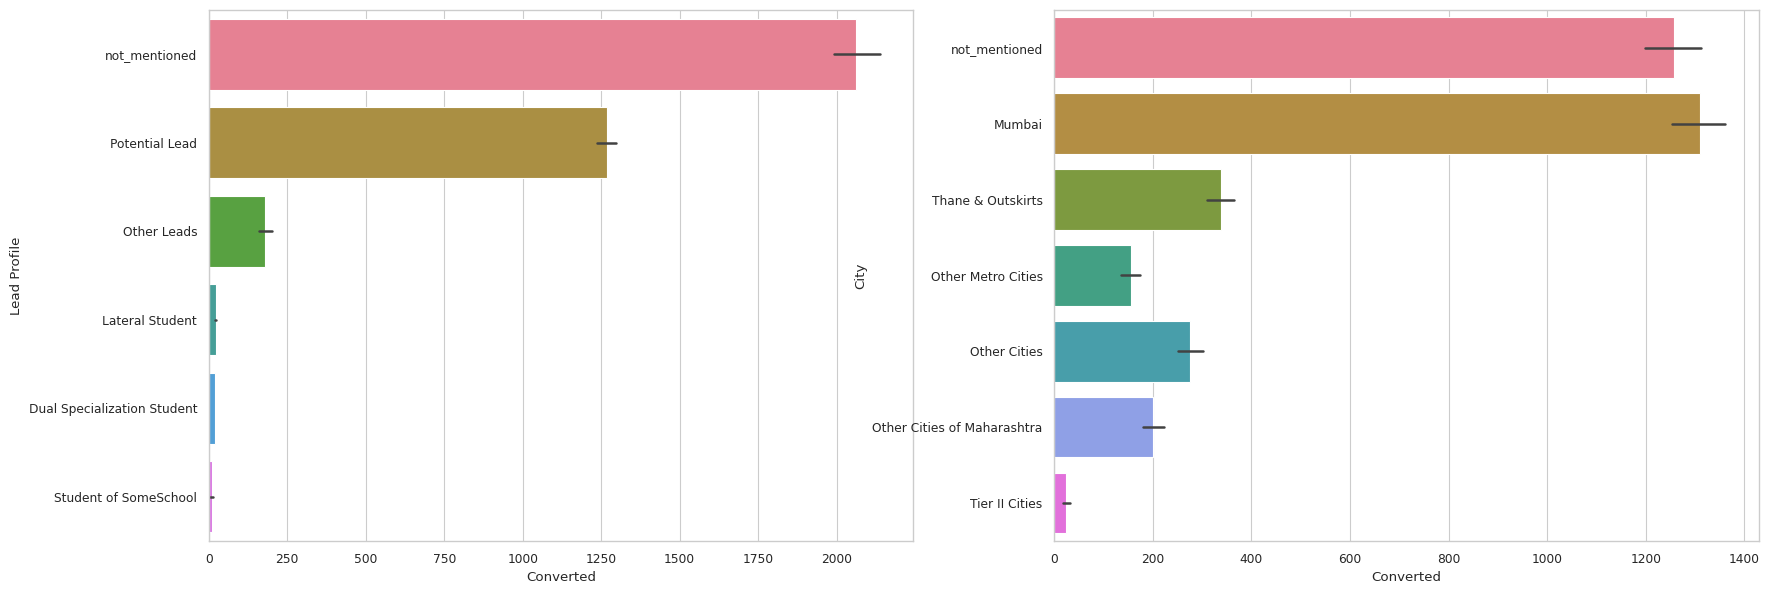

In [297]:
lst_br2=['Lead Profile','City']
lst_br=lst_br2
plot_bar(leads_2)

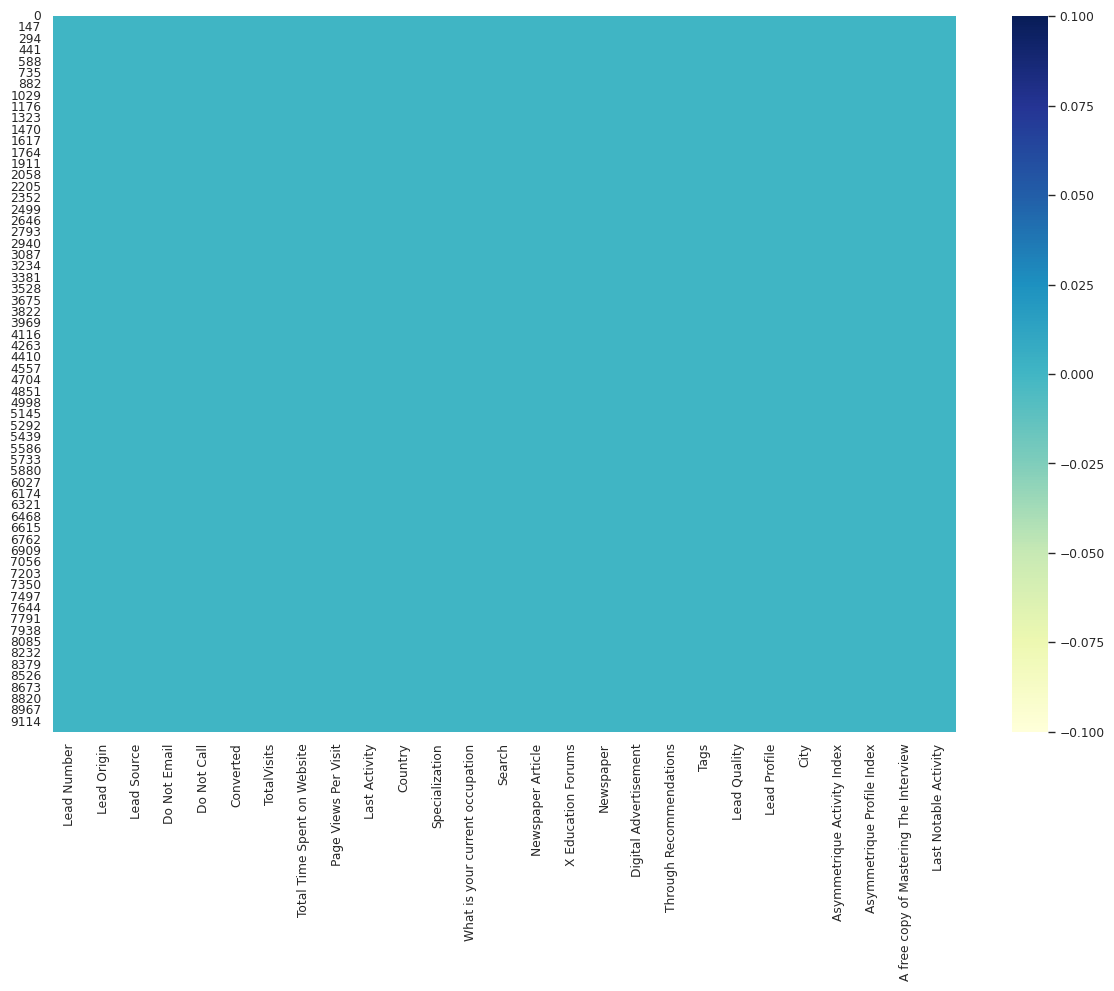

In [298]:
plt.figure(figsize=(12,10))
sns.heatmap(leads_2.isnull(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [299]:
# Checking stastical values of different features at 25%,50%,75%,90%,95% and 99%
leads_2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.39,3.44,487.70,2.33
std,23406.00,0.49,4.82,548.02,2.16
min,579533.00,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,12.00,0.00
50%,615479.00,0.00,3.00,248.00,2.00
75%,637387.25,1.00,5.00,936.00,3.00
max,660737.00,1.00,251.00,2272.00,55.00


### Checking outliers:
-To vesualize outliers we can draw different plots.

In [300]:
# dist plots to check outliers
# creating a custom function for dist plot
lst=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
def plot_box(leads):
    columns=lst
    plt.figure(figsize=(15, 6))
    for var in columns:
        plt.subplot(1,3,columns.index(var)+1)
        sns.boxplot(y = var, data = leads)
    plt.show()

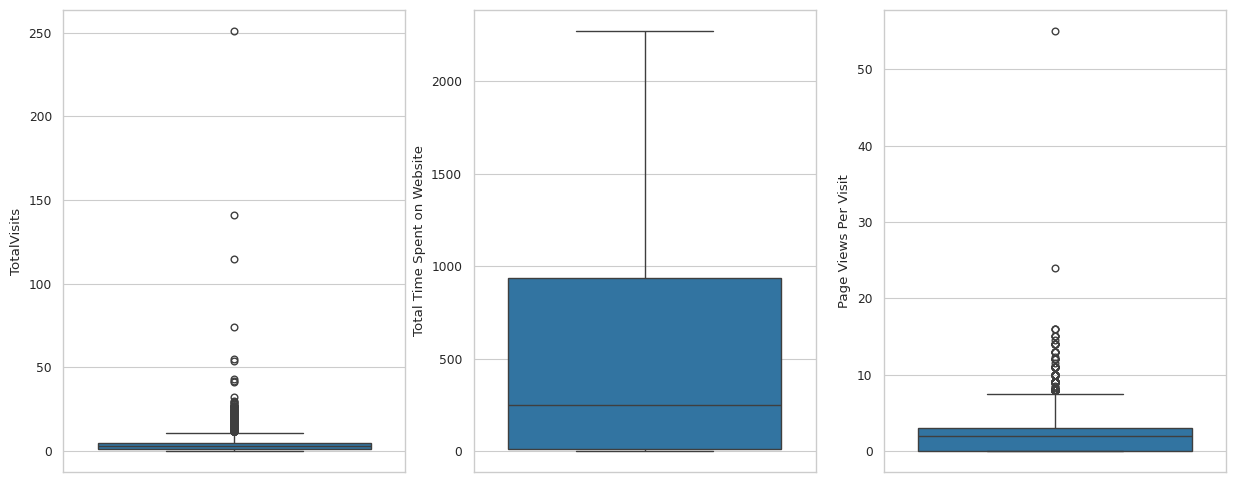

In [301]:
plot_box(leads_2)

In [302]:
def plot_dist(leads):
    columns=lst
    plt.figure(figsize=(20, 6))
    for var in columns:
        plt.subplot(1,3,columns.index(var)+1)
        sns.distplot(leads[var])
    plt.show()

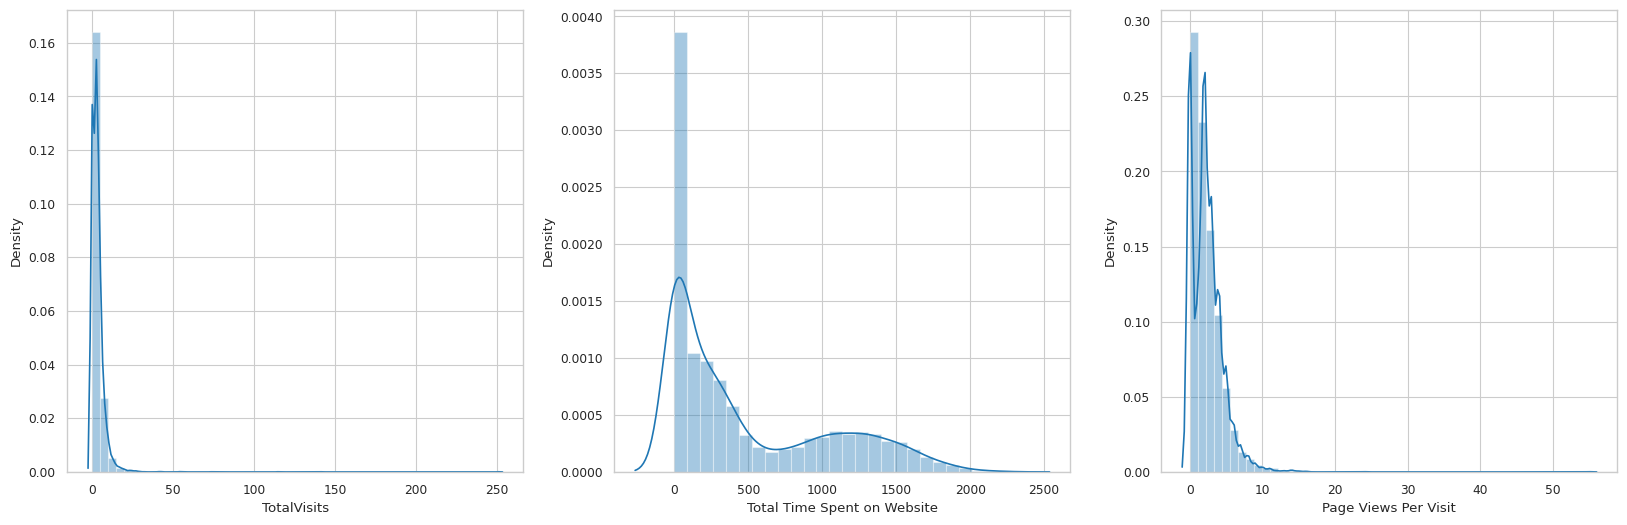

In [303]:
plot_dist(leads_2)

- plots show outlayers in TotalVisits,Page Views Per Visit,
- plots "Views vs Time Spent " and "TotalVisits & Time Spent " may be drawn

In [304]:
lst_s=['Page Views Per Visit','TotalVisits']
def plot_sc(leads,xv):
    columns=lst_s
    plt.figure(figsize=(10,10))
    for var in columns:
        plt.subplot(2, 1,columns.index(var)+1)
        sns.scatterplot(y=xv,x=var,legend='full',data=leads)
        plt.tight_layout()
    plt.show()

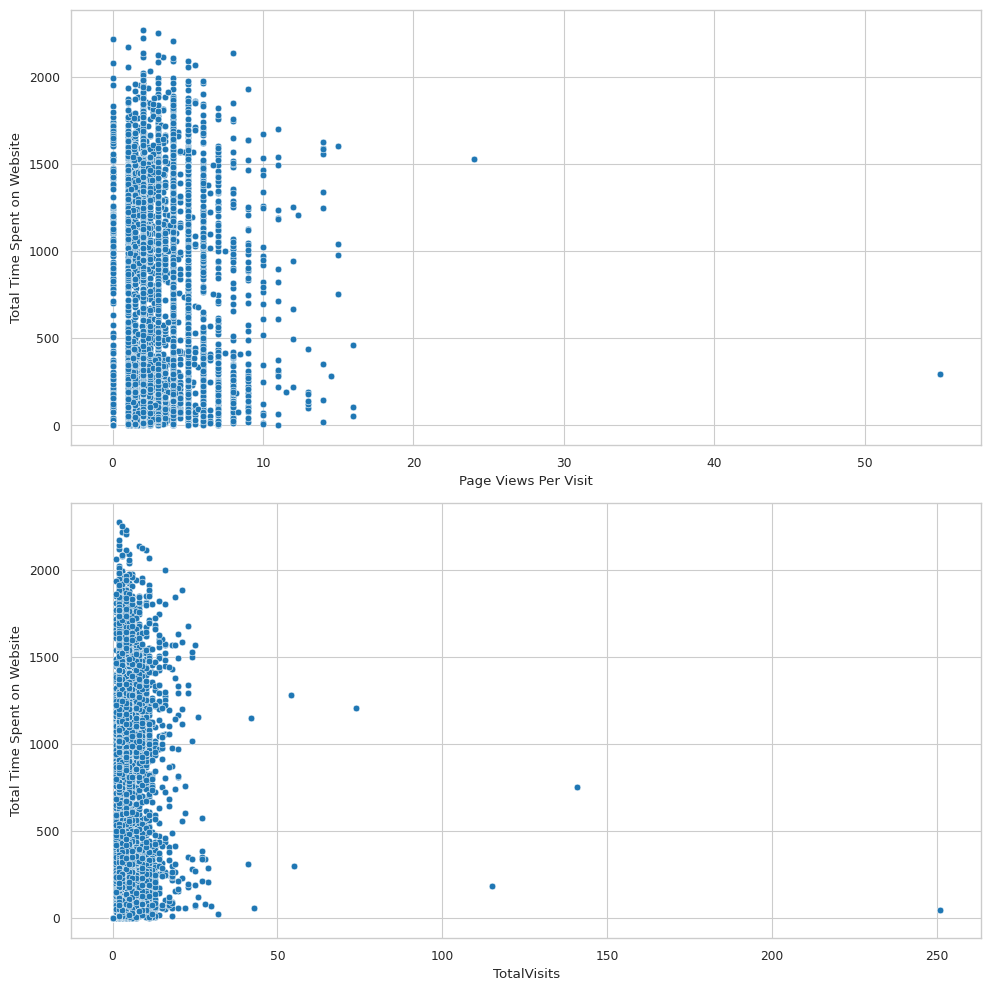

In [305]:
plot_sc(leads_2,'Total Time Spent on Website')

In [306]:
# Checking stastical values of different features at 25%,50%,75%,90%,95% and 99%
leads_2.describe(percentiles=[.05,0.1,.25,.5,.75,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.00,9240.00,9240.00,9240.00,9240.00
mean,617188.44,0.39,3.44,487.70,2.33
std,23406.00,0.49,4.82,548.02,2.16
min,579533.00,0.00,0.00,0.00,0.00
5%,582869.90,0.00,0.00,0.00,0.00
10%,586361.70,0.00,0.00,0.00,0.00
25%,596484.50,0.00,1.00,12.00,0.00
50%,615479.00,0.00,3.00,248.00,2.00
75%,637387.25,1.00,5.00,936.00,3.00
95%,655404.05,1.00,10.00,1562.00,6.00


In [307]:
# we may treat outliers by  by clipping the values of these variables outside of these percentile values of 95% .

leads_2['TotalVisits'][(leads_2['TotalVisits']>10)] =10
leads_2['Page Views Per Visit'][(leads_2['Page Views Per Visit']>6)] =6

leads_2.shape

(9240, 27)

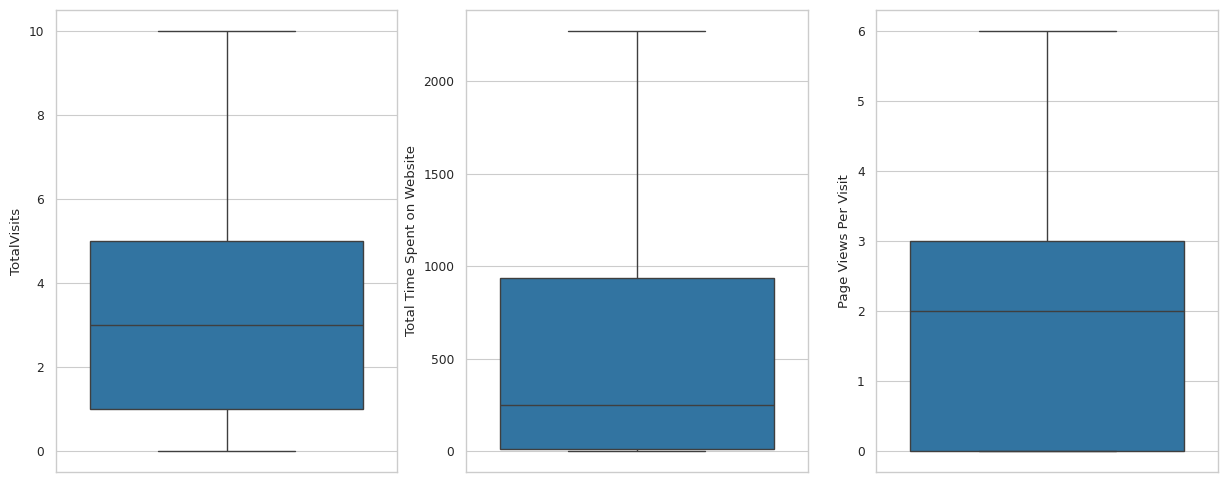

In [308]:
plot_box(leads_2)

In [309]:
lst_1=[]
lst_2=[]
lst_3=[]
lst_4=[]
lst_u=leads_2.columns
ln_d=len(lst_u)
for i in range(0,ln_d) :
    if leads_2[lst_u[i]].dtype=='object' :
        if leads_2[lst_u[i]].nunique()==2:
            lst_1.append (lst_u[i])
        else:
            lst_2.append (lst_u[i])
    else:
        if leads_2[lst_u[i]].nunique()==2:
            lst_3.append (lst_u[i])
        else:
            lst_4.append (lst_u[i])


print(len(lst_1),len(lst_2),len(lst_3),len(lst_4),)

10 12 1 4


In [310]:
 print("-columns with numaric data with more than two values-",lst_4 , "and one binary column--", lst_3,)

-columns with numaric data with more than two values- ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] and one binary column-- ['Converted']


In [311]:
print(lst_1)

['Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


- From lst_1 we see that ten columns are with binary values,nine with 'Yes'/'No' . so those can be converted with binary values as 1/0 . but 'Country' with 'India'/"Outside_India" to be treated separately lt us drop it from lst_1 and append to lst_2.

In [312]:
lst_1.remove('Country')
lst_2.append('Country')
print(lst_2)
print(lst_1)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity', 'Country']
['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


In [313]:
# converting columns in lst_1 into binary 1 / 0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_2[lst_1] = leads_2[lst_1].apply(binary_map)

In [314]:
leads_2.shape

(9240, 27)

- From lst_2 we see that 13 colums have multiple categorical variables, we can create  dummy variables for each of these  variables and concatanet with main dataframe 'leads_2'. after concatination the the columns with these 13 main variables should be dropped out to avoid duplication and thus the dataframe will not contain any categorical variable.

In [315]:
print (lst_nm)

['Last Activity', 'Tags', 'Specialization', 'What is your current occupation', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [316]:
# we define a list
lst_wm=['Country', 'Lead Source','Lead Origin','Last Notable Activity']
# columns of abobe list members  donot contain  a value named "not_mentioned"
# but columns in 'lst_nm' contain  it so these two lists  will be treated and  separately,

# Creating a dummy variable for  categorical variables in lst_wm and dropping the first one.
dummy1 = pd.get_dummies(leads_2[lst_wm], drop_first=True)
# Adding the results to the master dataframe
leads = pd.concat([leads_2, dummy1], axis=1)
leads.shape


(9240, 67)

In [317]:
leads = leads.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity',
                    'Country','Lead Source','Last Notable Activity'], axis=1)

leads.shape

(9240, 54)

In [318]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,660727,0,0,1,2.00,1532,2.00,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,0,1.00,305,1.00,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,660681,0,0,1,2.00,1428,1.00,0,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [319]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [320]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(9240, 54)
(9240, 54)


### Test-Train Split

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.00,674,2.50,0,0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,0,2.00,1532,2.00,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,0,1.00,305,1.00,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,0,2.00,1428,1.00,0,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [323]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [324]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [325]:
from sklearn.preprocessing import StandardScaler

In [326]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-1.15,-0.89,-1.23,0,0,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6795,0,0,0.30,0.01,-0.49,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3516,0,0,0.66,-0.69,0.16,0,0,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
8105,0,0,0.66,1.37,1.55,0,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3934,0,0,-1.15,-0.89,-1.23,0,0,0,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [327]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00
mean,0.08,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31
std,0.27,0.02,1.00,1.00,1.00,0.04,0.02,0.01,0.01,0.02,0.03,0.46
min,0.00,0.00,-1.15,-0.89,-1.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,-0.79,-0.86,-1.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,-0.06,-0.44,-0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.66,0.81,0.44,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,2.47,3.27,2.11,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Checking the Lead Conversion Rate

In [328]:
X_train.head()
# Convert all columns to integers
X_train = X_train.astype(int)

X_test = X_test.astype(int)

In [329]:

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

### Model Building:
Let's start by splitting our data into a training set and a test set and runn First Training Model

In [330]:
import statsmodels.api as sm

In [331]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 May 2024   Deviance:                   1.6229e+05
Time:                        09:44:15   Pearson chi2:                 7.94e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -8.358e+14   3.92e+07  -2.13e+07      0.000   -8.36e+14   -8.36e+14
Do Not Email                                       -2.583e+14   3.48e+06  -7.43e+07      0.000   -2.58e+14   -2.58e+14
Do Not Call                                          5.49e+15   4.75e+07   1.16e+08      0.000    5.49e+15    5.49e+15
TotalVisits                                         2.007e+14   1.71e+06   1.17e+08      0.000    2.01e+14    2.01e+14
Total Time Spent on Website                         9.291e+14   1.62e+06   5.75e+08      0.000    9.29e+14    9.29e+14
Page Views Per Visit                               -1.675e+14   1.81e+06  -9.27e+07      0.000   -1.67e+14   -1.67e+14
Search                                             -1.477e+15   2.21e+07  -6.69e+07      0.000   -1.48e+15   -1.48e+15
Newspaper Article                                   5.913e+15   6.73e+07   8.79e+07      0.000    5.91e+15    5.91e+15
X Education Forums                                 -4.108e+15   1.11e+08   -3.7e+07      0.000   -4.11e+15   -4.11e+15
Newspaper                                          -6.495e+15   6.73e+07  -9.65e+07      0.000   -6.49e+15   -6.49e+15
Digital Advertisement                              -4.434e+15   4.76e+07  -9.32e+07      0.000   -4.43e+15   -4.43e+15
Through Recommendations                             1.096e+15   2.85e+07   3.84e+07      0.000     1.1e+15     1.1e+15
A free copy of Mastering The Interview              -5.77e+14   2.61e+06  -2.21e+08      0.000   -5.77e+14   -5.77e+14
Country_Outside India                              -9.539e+13   4.88e+06  -1.95e+07      0.000   -9.54e+13   -9.54e+13
Lead Source_Direct Traffic                          5.371e+14   4.09e+07   1.31e+07      0.000    5.37e+14    5.37e+14
Lead Source_Facebook                                7.733e+14    6.3e+07   1.23e+07      0.000    7.73e+14    7.73e+14
Lead Source_Google                                  7.396e+14   4.08e+07   1.81e+07      0.000     7.4e+14     7.4e+14
Lead Source_Live Chat                               3.741e+15   6.13e+07    6.1e+07      0.000    3.74e+15    3.74e+15
Lead Source_NC_EDM                                  5.747e+15   7.86e+07   7.31e+07      0.000    5.75e+15    5.75e+15
Lead Source_Olark Chat                              1.019e+15    4.1e+07   2.49e+07      0.000    1.02e+15    1.02e+15
Lead Source_Organic Search                         -3.627e+13   4.09e+07  -8.86e+05      0.000   -3.63e+13   -3.63e+13
Lead Source_Pay per Click Ads                      -3.612e+15   7.86e+07   -4.6e+07      0.000   -3.61e+15   -3.61e+15
Lead Source_Press_Release                           1.667e+15   6.28e+07   2.65e+07      0.000    1.67e+15  

### Feature Selection Using RFE

In [332]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [333]:

rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [334]:
rfe.support_

array([ True,  True, False,  True, False, False,  True, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False, False])

In [335]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Search', False, 5),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 12),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 29),
 ('Country_Outside India', False, 30),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 24),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 13),
 ('Lead Source_Press_Release', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 9),
 ('Lead Source_Welingak Web

In [336]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Source_NC_EDM',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [337]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'X Education Forums',
       'A free copy of Mastering The Interview', 'Country_Outside India',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable 

### Assessing the model with StatsModels

In [338]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.8
Date:                Tue, 14 May 2024   Deviance:                       6253.6
Time:                        09:44:18   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3041
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.2660      0.339     -0.785      0.432      -0.930       0.398
Do Not Email                                      -1.4867      0.177     -8.381      0.000      -1.834      -1.139
Do Not Call                                       22.2730   3.12e+04      0.001      0.999   -6.11e+04    6.11e+04
Total Time Spent on Website                        1.3729      0.060     22.771      0.000       1.255       1.491
Newspaper Article                                 22.8138   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Newspaper                                        -24.1856   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                            -44.0598   3.09e+04     -0.001      0.999   -6.05e+04    6.05e+04
Through Recommendations                            2.0965      1.163      1.803      0.071      -0.182       4.375
Lead Source_NC_EDM                                23.6924   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                              0.9020      0.517      1.745      0.081      -0.111       1.915
Lead Source_Social Media                           1.8322      1.416      1.294      0.196      -0.942       4.607
Lead Source_Welingak Website                       2.3902      0.868      2.755      0.006       0.690       4.091
Lead Origin_Lead Add Form                          2.5412      0.483      5.258      0.000       1.594       3.489
Last Notable Activity_Email Link Clicked          -1.3885      0.418     -3.319      0.001      -2.209      -0.568
Last Notable Activity_Email Opened                -0.8603      0.342     -2.512      0.012      -1.531      -0.189
Last Notable Activity_Had a Phone Conversation     2.1692      1.119      1.939      0.053      -0.024       4.362
Last Notable Activity_Modified                    -1.5662      0.339     -4.615      0.000      -2.231      -0.901
Last Notable Activity_Olark Chat Conversation     -1.9486      0.445     -4.381      0.000      -2.820      -1.077
Last Notable Activity_Page Visited on Website     -1.0456      0.371     -2.816      0.005      -1.773      -0.318
Last Notable Activity_SMS Sent                     0.4985      0.339      1.468      0.142      -0.167       1.164
Last Notable Activity_Unreachable                  0.4320      0.593      0.729      0.466      -0.730       1.594
==================================================================================================================
"""

In [339]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.24
6795   0.24
3516   0.24
8105   0.83
3934   0.14
4844   0.83
3297   0.24
8071   0.83
987    0.14
7423   0.83
dtype: float64

In [340]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24484712, 0.24484712, 0.24484712, 0.83276813, 0.13797873,
       0.83276813, 0.24484712, 0.83355705, 0.13797873, 0.83276813])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [341]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.24,1871
1,0,0.24,6795
2,0,0.24,3516
3,0,0.83,8105
4,0,0.14,3934


In [342]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.24,1871,0
1,0,0.24,6795,0
2,0,0.24,3516,0
3,0,0.83,8105,1
4,0,0.14,3934,0


#####  Confusion Metrics Creation:

In [343]:
from sklearn import metrics

In [344]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  671]
 [ 765 1701]]


In [345]:
# Predicted   not_churn   churn
# Actual
# not_churn
# churn

In [346]:
# overall accuracy  check :
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7779839208410637


#### VIFs Checking

In [347]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [348]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Origin_Lead Add Form,15.75
8,Lead Source_Reference,12.88
10,Lead Source_Welingak Website,3.77
2,Total Time Spent on Website,1.27
3,Newspaper Article,1.25
5,Digital Advertisement,1.22
18,Last Notable Activity_SMS Sent,1.19
15,Last Notable Activity_Modified,1.18
0,Do Not Email,1.11
6,Through Recommendations,1.10


#### Not much multicollinearity present in our model among the selected features as per their VIF values.

##### Let us draw heat map to check the correlation among the features :

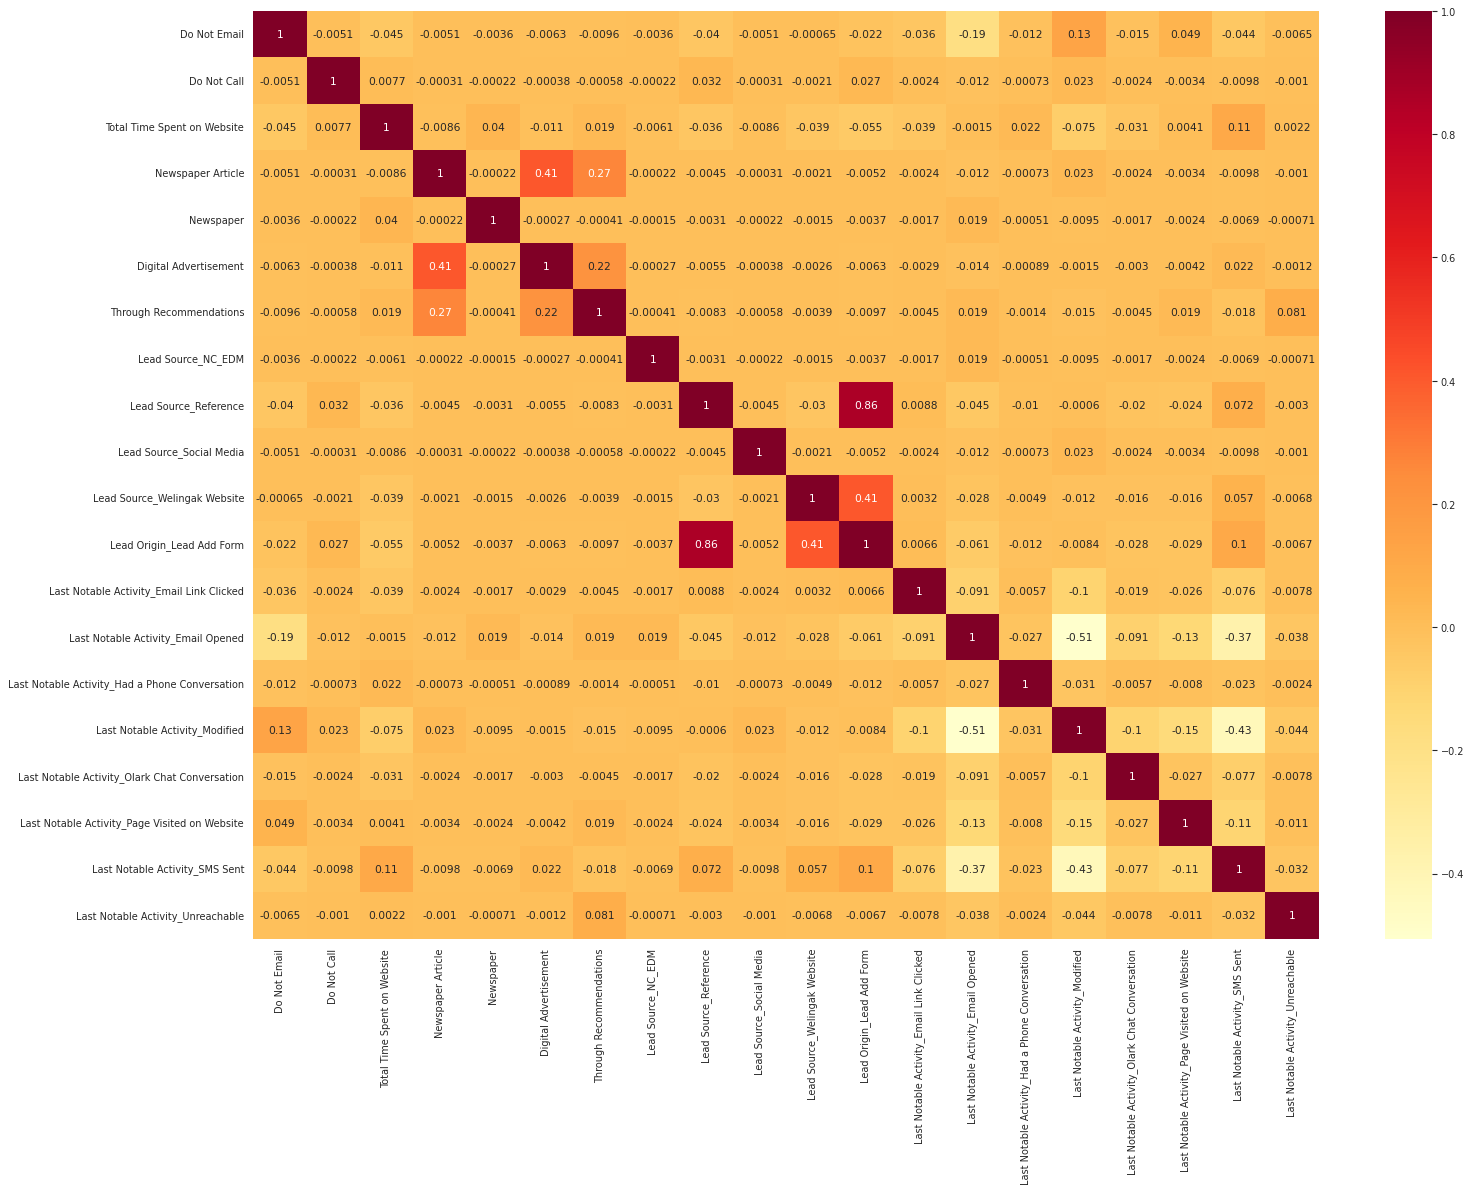

In [349]:

plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlOrRd")
plt.tight_layout()
plt.show()

#### Variable Dropping and Updating the Model

In [350]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.8
Date:                Tue, 14 May 2024   Deviance:                       6253.6
Time:                        09:44:21   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3041
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.2660      0.339     -0.785      0.432      -0.930       0.398
Do Not Email                                      -1.4867      0.177     -8.381      0.000      -1.834      -1.139
Do Not Call                                       22.2730   3.12e+04      0.001      0.999   -6.11e+04    6.11e+04
Total Time Spent on Website                        1.3729      0.060     22.771      0.000       1.255       1.491
Newspaper Article                                 22.8138   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Newspaper                                        -24.1856   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                            -44.0598   3.09e+04     -0.001      0.999   -6.05e+04    6.05e+04
Through Recommendations                            2.0965      1.163      1.803      0.071      -0.182       4.375
Lead Source_NC_EDM                                23.6924   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                              0.9020      0.517      1.745      0.081      -0.111       1.915
Lead Source_Social Media                           1.8322      1.416      1.294      0.196      -0.942       4.607
Lead Source_Welingak Website                       2.3902      0.868      2.755      0.006       0.690       4.091
Lead Origin_Lead Add Form                          2.5412      0.483      5.258      0.000       1.594       3.489
Last Notable Activity_Email Link Clicked          -1.3885      0.418     -3.319      0.001      -2.209      -0.568
Last Notable Activity_Email Opened                -0.8603      0.342     -2.512      0.012      -1.531      -0.189
Last Notable Activity_Had a Phone Conversation     2.1692      1.119      1.939      0.053      -0.024       4.362
Last Notable Activity_Modified                    -1.5662      0.339     -4.615      0.000      -2.231      -0.901
Last Notable Activity_Olark Chat Conversation     -1.9486      0.445     -4.381      0.000      -2.820      -1.077
Last Notable Activity_Page Visited on Website     -1.0456      0.371     -2.816      0.005      -1.773      -0.318
Last Notable Activity_SMS Sent                     0.4985      0.339      1.468      0.142      -0.167       1.164
Last Notable Activity_Unreachable                  0.4320      0.593      0.729      0.466      -0.730       1.594
==================================================================================================================
"""

In [351]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.24
6795   0.24
3516   0.24
8105   0.83
3934   0.14
4844   0.83
3297   0.24
8071   0.83
987    0.14
7423   0.83
dtype: float64

In [352]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24484712, 0.24484712, 0.24484712, 0.83276813, 0.13797873,
       0.83276813, 0.24484712, 0.83355705, 0.13797873, 0.83276813])

In [353]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.24,1871
1,0,0.24,6795
2,0,0.24,3516
3,0,0.83,8105
4,0,0.14,3934


In [354]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.24,1871,0
1,0,0.24,6795,0
2,0,0.24,3516,0
3,0,0.83,8105,1
4,0,0.14,3934,0


In [355]:
from sklearn import metrics

In [356]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  671]
 [ 765 1701]]


In [357]:
# Predicted   not_churn   churn
# Actual
# not_churn
# churn

In [358]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7779839208410637


#### Checking VIFs

In [359]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [360]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Origin_Lead Add Form,15.75
8,Lead Source_Reference,12.88
10,Lead Source_Welingak Website,3.77
2,Total Time Spent on Website,1.27
3,Newspaper Article,1.25
5,Digital Advertisement,1.22
18,Last Notable Activity_SMS Sent,1.19
15,Last Notable Activity_Modified,1.18
0,Do Not Email,1.11
6,Through Recommendations,1.10


##### Dropping the Variable and Updating the Model
As we can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [361]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.8
Date:                Tue, 14 May 2024   Deviance:                       6253.6
Time:                        09:44:22   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3041
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.2660      0.339     -0.785      0.432      -0.930       0.398
Do Not Email                                      -1.4867      0.177     -8.381      0.000      -1.834      -1.139
Do Not Call                                       22.2730   3.12e+04      0.001      0.999   -6.11e+04    6.11e+04
Total Time Spent on Website                        1.3729      0.060     22.771      0.000       1.255       1.491
Newspaper Article                                 22.8138   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Newspaper                                        -24.1856   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                            -44.0598   3.09e+04     -0.001      0.999   -6.05e+04    6.05e+04
Through Recommendations                            2.0965      1.163      1.803      0.071      -0.182       4.375
Lead Source_NC_EDM                                23.6924   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                              0.9020      0.517      1.745      0.081      -0.111       1.915
Lead Source_Social Media                           1.8322      1.416      1.294      0.196      -0.942       4.607
Lead Source_Welingak Website                       2.3902      0.868      2.755      0.006       0.690       4.091
Lead Origin_Lead Add Form                          2.5412      0.483      5.258      0.000       1.594       3.489
Last Notable Activity_Email Link Clicked          -1.3885      0.418     -3.319      0.001      -2.209      -0.568
Last Notable Activity_Email Opened                -0.8603      0.342     -2.512      0.012      -1.531      -0.189
Last Notable Activity_Had a Phone Conversation     2.1692      1.119      1.939      0.053      -0.024       4.362
Last Notable Activity_Modified                    -1.5662      0.339     -4.615      0.000      -2.231      -0.901
Last Notable Activity_Olark Chat Conversation     -1.9486      0.445     -4.381      0.000      -2.820      -1.077
Last Notable Activity_Page Visited on Website     -1.0456      0.371     -2.816      0.005      -1.773      -0.318
Last Notable Activity_SMS Sent                     0.4985      0.339      1.468      0.142      -0.167       1.164
Last Notable Activity_Unreachable                  0.4320      0.593      0.729      0.466      -0.730       1.594
==================================================================================================================
"""

In [362]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.24
6795   0.24
3516   0.24
8105   0.83
3934   0.14
4844   0.83
3297   0.24
8071   0.83
987    0.14
7423   0.83
dtype: float64

In [363]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24484712, 0.24484712, 0.24484712, 0.83276813, 0.13797873,
       0.83276813, 0.24484712, 0.83355705, 0.13797873, 0.83276813])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [364]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.24,1871
1,0,0.24,6795
2,0,0.24,3516
3,0,0.83,8105
4,0,0.14,3934


In [365]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.24,1871,0
1,0,0.24,6795,0
2,0,0.24,3516,0
3,0,0.83,8105,1
4,0,0.14,3934,0


In [366]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  671]
 [ 765 1701]]


In [367]:
# Predicted not_churn churn
# Actual
# not_churn 3270 365
# churn 579 708

In [368]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7779839208410637


#### Checking VIFs

In [369]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [370]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Origin_Lead Add Form,15.75
8,Lead Source_Reference,12.88
10,Lead Source_Welingak Website,3.77
2,Total Time Spent on Website,1.27
3,Newspaper Article,1.25
5,Digital Advertisement,1.22
18,Last Notable Activity_SMS Sent,1.19
15,Last Notable Activity_Modified,1.18
0,Do Not Email,1.11
6,Through Recommendations,1.10


#### Dropping the Variable and Updating the Model

In [371]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.8
Date:                Tue, 14 May 2024   Deviance:                       6253.6
Time:                        09:44:23   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3041
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.2660      0.339     -0.785      0.432      -0.930       0.398
Do Not Email                                      -1.4867      0.177     -8.381      0.000      -1.834      -1.139
Do Not Call                                       22.2730   3.12e+04      0.001      0.999   -6.11e+04    6.11e+04
Total Time Spent on Website                        1.3729      0.060     22.771      0.000       1.255       1.491
Newspaper Article                                 22.8138   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Newspaper                                        -24.1856   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                            -44.0598   3.09e+04     -0.001      0.999   -6.05e+04    6.05e+04
Through Recommendations                            2.0965      1.163      1.803      0.071      -0.182       4.375
Lead Source_NC_EDM                                23.6924   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                              0.9020      0.517      1.745      0.081      -0.111       1.915
Lead Source_Social Media                           1.8322      1.416      1.294      0.196      -0.942       4.607
Lead Source_Welingak Website                       2.3902      0.868      2.755      0.006       0.690       4.091
Lead Origin_Lead Add Form                          2.5412      0.483      5.258      0.000       1.594       3.489
Last Notable Activity_Email Link Clicked          -1.3885      0.418     -3.319      0.001      -2.209      -0.568
Last Notable Activity_Email Opened                -0.8603      0.342     -2.512      0.012      -1.531      -0.189
Last Notable Activity_Had a Phone Conversation     2.1692      1.119      1.939      0.053      -0.024       4.362
Last Notable Activity_Modified                    -1.5662      0.339     -4.615      0.000      -2.231      -0.901
Last Notable Activity_Olark Chat Conversation     -1.9486      0.445     -4.381      0.000      -2.820      -1.077
Last Notable Activity_Page Visited on Website     -1.0456      0.371     -2.816      0.005      -1.773      -0.318
Last Notable Activity_SMS Sent                     0.4985      0.339      1.468      0.142      -0.167       1.164
Last Notable Activity_Unreachable                  0.4320      0.593      0.729      0.466      -0.730       1.594
==================================================================================================================
"""

In [372]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.24
6795   0.24
3516   0.24
8105   0.83
3934   0.14
4844   0.83
3297   0.24
8071   0.83
987    0.14
7423   0.83
dtype: float64

In [373]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24484712, 0.24484712, 0.24484712, 0.83276813, 0.13797873,
       0.83276813, 0.24484712, 0.83355705, 0.13797873, 0.83276813])

In [374]:
# Creating a dataframe with the actual churn flag and the predicted probabilities


y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.24,1871
1,0,0.24,6795
2,0,0.24,3516
3,0,0.83,8105
4,0,0.14,3934


In [375]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0:

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.24,1871,0
1,0,0.24,6795,0
2,0,0.24,3516,0
3,0,0.83,8105,1
4,0,0.14,3934,0


In [376]:
from sklearn import metrics

In [377]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  671]
 [ 765 1701]]


In [378]:
# Predicted not_churn churn
# Actual
# not_churn 3270 365
# churn 579 708

In [379]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7779839208410637


In [380]:
# Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [381]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Origin_Lead Add Form,15.75
8,Lead Source_Reference,12.88
10,Lead Source_Welingak Website,3.77
2,Total Time Spent on Website,1.27
3,Newspaper Article,1.25
5,Digital Advertisement,1.22
18,Last Notable Activity_SMS Sent,1.19
15,Last Notable Activity_Modified,1.18
0,Do Not Email,1.11
6,Through Recommendations,1.10


In [382]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3126.8
Date:                Tue, 14 May 2024   Deviance:                       6253.6
Time:                        09:44:24   Pearson chi2:                 6.77e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3041
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.2660      0.339     -0.785      0.432      -0.930       0.398
Do Not Email                                      -1.4867      0.177     -8.381      0.000      -1.834      -1.139
Do Not Call                                       22.2730   3.12e+04      0.001      0.999   -6.11e+04    6.11e+04
Total Time Spent on Website                        1.3729      0.060     22.771      0.000       1.255       1.491
Newspaper Article                                 22.8138   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Newspaper                                        -24.1856   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                            -44.0598   3.09e+04     -0.001      0.999   -6.05e+04    6.05e+04
Through Recommendations                            2.0965      1.163      1.803      0.071      -0.182       4.375
Lead Source_NC_EDM                                23.6924   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Reference                              0.9020      0.517      1.745      0.081      -0.111       1.915
Lead Source_Social Media                           1.8322      1.416      1.294      0.196      -0.942       4.607
Lead Source_Welingak Website                       2.3902      0.868      2.755      0.006       0.690       4.091
Lead Origin_Lead Add Form                          2.5412      0.483      5.258      0.000       1.594       3.489
Last Notable Activity_Email Link Clicked          -1.3885      0.418     -3.319      0.001      -2.209      -0.568
Last Notable Activity_Email Opened                -0.8603      0.342     -2.512      0.012      -1.531      -0.189
Last Notable Activity_Had a Phone Conversation     2.1692      1.119      1.939      0.053      -0.024       4.362
Last Notable Activity_Modified                    -1.5662      0.339     -4.615      0.000      -2.231      -0.901
Last Notable Activity_Olark Chat Conversation     -1.9486      0.445     -4.381      0.000      -2.820      -1.077
Last Notable Activity_Page Visited on Website     -1.0456      0.371     -2.816      0.005      -1.773      -0.318
Last Notable Activity_SMS Sent                     0.4985      0.339      1.468      0.142      -0.167       1.164
Last Notable Activity_Unreachable                  0.4320      0.593      0.729      0.466      -0.730       1.594
==================================================================================================================
"""

In [383]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.24
6795   0.24
3516   0.24
8105   0.83
3934   0.14
4844   0.83
3297   0.24
8071   0.83
987    0.14
7423   0.83
dtype: float64

In [384]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24484712, 0.24484712, 0.24484712, 0.83276813, 0.13797873,
       0.83276813, 0.24484712, 0.83355705, 0.13797873, 0.83276813])

In [385]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.24,1871
1,0,0.24,6795
2,0,0.24,3516
3,0,0.83,8105
4,0,0.14,3934


In [386]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.24,1871,0
1,0,0.24,6795,0
2,0,0.24,3516,0
3,0,0.83,8105,1
4,0,0.14,3934,0


In [387]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  671]
 [ 765 1701]]


In [388]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7779839208410637


In [389]:
# Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Origin_Lead Add Form,15.75
8,Lead Source_Reference,12.88
10,Lead Source_Welingak Website,3.77
2,Total Time Spent on Website,1.27
3,Newspaper Article,1.25
5,Digital Advertisement,1.22
18,Last Notable Activity_SMS Sent,1.19
15,Last Notable Activity_Modified,1.18
0,Do Not Email,1.11
6,Through Recommendations,1.10


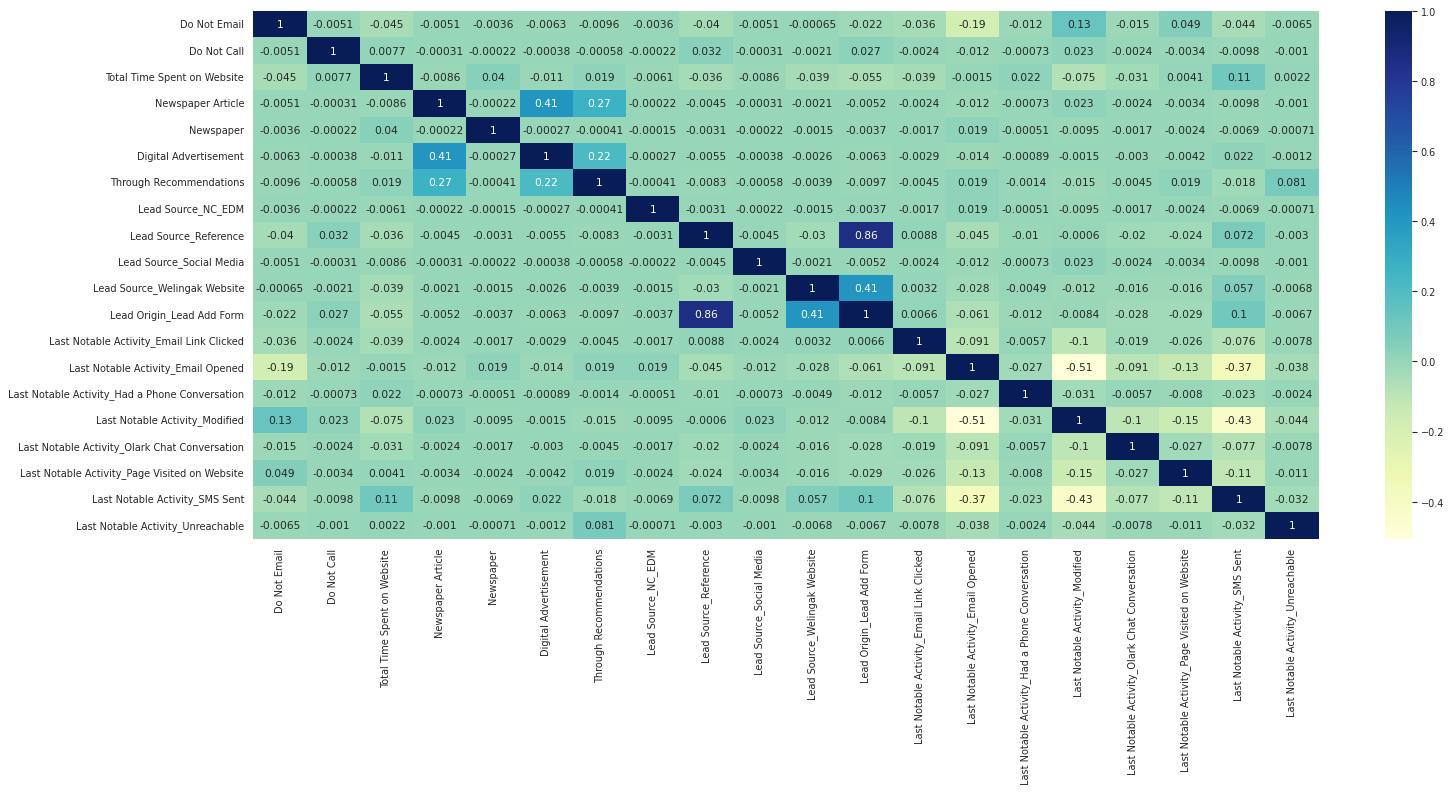

In [390]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

#### Observations : -
Features of our latest model:
- All variables have p-value < 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from
the heat map.
- The overall accuracy of 0.9125 at a probability threshold of 0.05 is also very acceptable.
##### So, we can proceed with making predictions without dropping any more variables and using this model only.

### Calculating Metrics beyond Accuracy

In [391]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [392]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6897810218978102

In [393]:
# Specificity calculation
TN / float(TN+FP)

0.8323338330834583

In [394]:
# Calculation of false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16766616691654174


In [395]:
# positive predictive value
print (TP / float(TP+FP))

0.7171163575042159


In [396]:
# Negative predictive value
print (TN / float(TN+ FN))

0.813232421875


### Plotting the ROC Curve

###### An ROC curve demonstrates several things,importants are:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [397]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr,tpr, thresholds

In [398]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

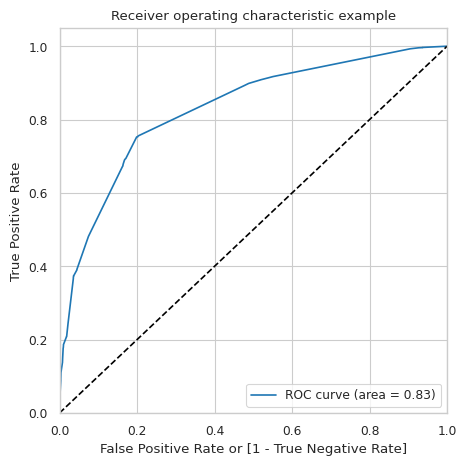

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.99750125e-04, 4.99750125e-04,
        4.99750125e-04, 4.99750125e-04, 4.99750125e-04, 2.99850075e-03,
        2.99850075e-03, 2.99850075e-03, 2.99850075e-03, 2.99850075e-03,
        2.99850075e-03, 2.99850075e-03, 2.99850075e-03, 2.99850075e-03,
        3.24837581e-03, 3.49825087e-03, 7.49625187e-03, 7.49625187e-03,
        7.49625187e-03, 7.74612694e-03, 7.74612694e-03, 7.74612694e-03,
        9.24537731e-03, 9.74512744e-03, 9.74512744e-03, 9.99500250e-03,
        9.99500250e-03, 1.79910045e-02, 1.82408796e-02, 2.17391304e-02,
        3.54822589e-02, 3.54822589e-02, 3.54822589e-02, 3.54822589e-02,
        3.57321339e-02, 3.59820090e-02, 3.59820090e-02, 3.59820090e-02,
        3.59820090e-02, 3.62318841e-02, 3.67316342e-02, 3.698150

In [399]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Calculating the area under the curve(GINI)

In [400]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [401]:
auc = auc_val(fpr,tpr)
auc

0.8299362078895669

### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [402]:
# Creation of columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
     y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.24,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.24,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.24,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.83,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.14,3934,0,1,1,0,0,0,0,0,0,0,0


In [403]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_leads = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_leads.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_leads)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.44   0.99   0.09
0.20  0.20      0.64   0.91   0.48
0.30  0.30      0.78   0.76   0.80
0.40  0.40      0.78   0.69   0.83
0.50  0.50      0.78   0.69   0.83
0.60  0.60      0.74   0.39   0.95
0.70  0.70      0.74   0.39   0.96
0.80  0.80      0.74   0.37   0.96
0.90  0.90      0.68   0.18   0.99


#### Plotting accuracy sensitivity and specificity for various probabilities.

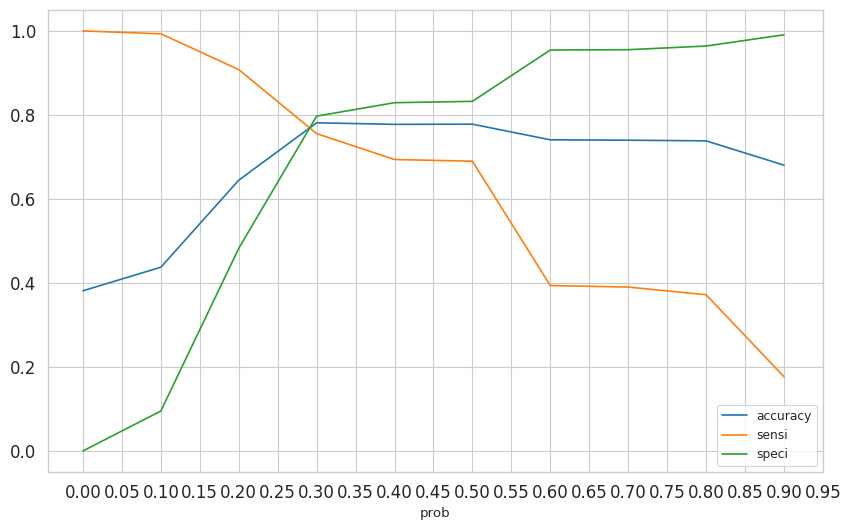

In [404]:

sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_leads.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

- From the curve above,we see three lines are meeting very close to 0.33 probability value. So 0.33  is taken as the optimum point to take it as a cutoff probability.

In [405]:
# Assigning final predictions based on conversion probability threshold
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

# Displaying the first few rows of the DataFrame with final predictions
y_train_pred_final.head()


,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.24,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.24,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.24,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.83,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.14,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [406]:
# Overall accuracy check.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7815398886827458

In [407]:
# Calculating confusion matrix using actual converted values and final predicted values
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1


array([[3198,  804],
       [ 609, 1857]])

In [408]:
TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [409]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7530413625304136

In [410]:
# Specificity
TN / float(TN+FP)

0.7991004497751124

In [411]:
# Calculation of false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20089955022488756


In [412]:
# Positive predictive value
print (TP / float(TP+FP))

0.6978579481397971


In [413]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8400315208825847


### Precision and Recall

  Precision
    
  TP / TP + FP

In [414]:
# Calculating precision using confusion matrix values
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.6978579481397971

#### Recall
TP / TP + FN

In [415]:
# Calculating recall using confusion matrix values
recall = confusion1[1, 1] / (confusion1[1, 0] + confusion1[1, 1])
recall


0.7530413625304136

##### Using sklearn utilities for the same

In [416]:
from sklearn.metrics import precision_score, recall_score

In [417]:
# Calculating precision score using actual converted values and final predicted values
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.6978579481397971

In [418]:
# Calculating recall score using actual converted values and final predicted values
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7530413625304136

#### Precision and recall tradeoff

In [419]:
from sklearn.metrics import precision_recall_curve

In [420]:
# Comparing actual converted values with final predicted values
y_train_pred_final.Converted, y_train_pred_final.final_predicted


(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [421]:
# Calculating precision, recall, and thresholds for precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

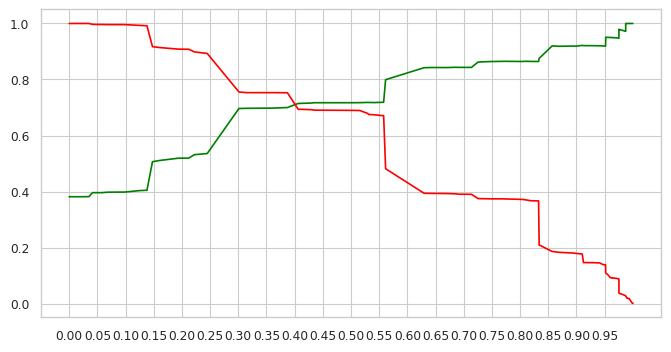

In [422]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80%.

#### This is already achieved with our earlier threshold value of 0.33. So we will stick to this value.

###  F1 score Calculation:

F1 = 2×(Precision*Recall)/(Precision+Recall)

In [423]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.724400234055003

### Making predictions on the test set

Using the scaler function from the train dataset to transfor the test dataset

In [424]:
# Scaling selected features in the test set using the fitted scaler
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

# Displaying the first few rows of the transformed test set
X_test.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Country_Outside India,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,1.75,0.96,2.11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,-1.15,-0.89,-1.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.66,-0.78,1.55,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0,-1.15,-0.89,-1.23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0,-1.15,-0.89,-1.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [425]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Lead Source_NC_EDM,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Lead Origin_Lead Add Form,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2376,0,0,-0.89,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
7766,0,0,-0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9199,0,0,-0.89,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4359,0,0,-0.89,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0


##### Adding the constant

In [426]:
X_test_sm = sm.add_constant(X_test)

In [427]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [428]:
y_test_pred[:10]

4269   0.83
2376   0.92
7766   0.29
9199   0.05
4359   0.75
9186   0.64
1631   0.55
8963   0.16
8007   0.10
5324   0.36
dtype: float64

In [429]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.83
2376,0.92
7766,0.29
9199,0.05
4359,0.75


In [430]:
# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)

In [431]:
# Putting CustID to index
y_test_leads['LeadID'] = y_test_leads.index

In [432]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

In [433]:
# Appending y_test_leads and y_pred_1
y_pred_final = pd.concat([y_test_leads, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.83
1,1,2376,0.92
2,1,7766,0.29
3,0,9199,0.05
4,1,4359,0.75


In [434]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [435]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [436]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,4269,1,0.83
1,2376,1,0.92
2,7766,1,0.29
3,9199,0,0.05
4,4359,1,0.75


In [437]:
y_pred_final.shape

(2772, 3)

#### Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert

In [438]:
# Assigning final predictions based on conversion probability threshold
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
# Displaying the first few rows of the DataFrame with final predictions
y_pred_final.head()


,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.83,1
1,2376,1,0.92,1
2,7766,1,0.29,0
3,9199,0,0.05,0
4,4359,1,0.75,1


In [439]:
# Overall accuracy checking.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.7871572871572872

In [440]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1365  312]
 [ 278  817]]


### Confusion Matrix in Visuals

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

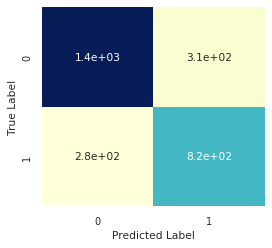

In [442]:
plt.figure(figsize=(3.5,3.2), dpi=80, facecolor='w', edgecolor='k', frameon='True')
cor = confusion_test
sns.heatmap(cor, annot=True, cmap="YlGnBu",cbar=False)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [443]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

Sensitivity

TP / TP + FN

In [444]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7461187214611872

In [445]:
# Specificity calculation:
TN / float(TN+FP)

0.813953488372093

False Postive Rate


FP / TN + FP

In [446]:
print(FP/ float(TN+FP))

0.18604651162790697


Positive Predictive Value

TP / TP + FP

In [447]:
print (TP / float(TP+FP))

0.7236492471213464


Negative Predictive Value

TN / TN + FN

In [448]:
print (TN / float(TN+ FN))

0.8307973219720024


Precision

TP / TP + FP

In [449]:
# Calculating precision using confusion matrix values
Precision = confusion_test[1, 1] / (confusion_test[0, 1] + confusion_test[1, 1])
Precision


0.7236492471213464

Recall

TP / TP + FN

In [450]:
# Calculating recall using confusion matrix values
Recall = confusion_test[1, 1] / (confusion_test[1, 0] + confusion_test[1, 1])
Recall


0.7461187214611872

F1 = 2×(Precision*Recall)/(Precision+Recall)

In [451]:
# Calculating the F1 score using precision and recall
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1


0.7347122302158273

Classification Report

In [452]:
from sklearn.metrics import classification_report

# Printing the classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1677
           1       0.72      0.75      0.73      1095

    accuracy                           0.79      2772
   macro avg       0.78      0.78      0.78      2772
weighted avg       0.79      0.79      0.79      2772



Cross Validation Score

To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [453]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression model with 'lbfgs' solver
lr = LogisticRegression(solver='lbfgs')

# Performing cross-validation with 10 folds
scores = cross_val_score(lr, X, y, cv=10)

# Sorting the cross-validation scores
scores.sort()

# Calculating the mean accuracy
accuracy = scores.mean()

# Displaying individual cross-validation scores and mean accuracy
print(scores)
print(accuracy)


[0.72727273 0.75108225 0.77705628 0.80194805 0.80194805 0.80735931
 0.81277056 0.82575758 0.82683983 0.84090909]
0.7972943722943723


### Plotting the ROC Curve for Test Dataset

In [454]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr,tpr, thresholds

In [455]:
# Calculating the false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

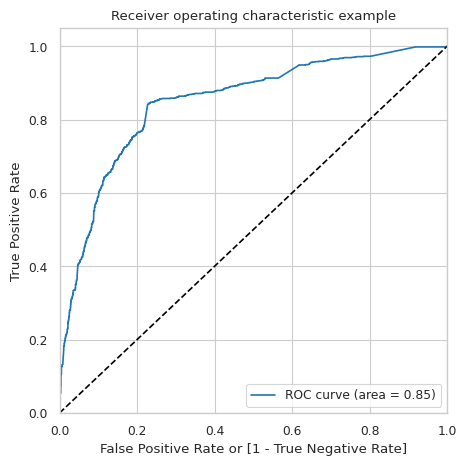

(array([0.        , 0.        , 0.        , ..., 0.99880739, 1.        ,
        1.        ]),
 array([0.00000000e+00, 9.13242009e-04, 1.82648402e-03, ...,
        9.99086758e-01, 9.99086758e-01, 1.00000000e+00]),
 array([1.99745109e+00, 9.97451094e-01, 9.95926627e-01, ...,
        1.06194189e-02, 7.26893664e-03, 1.55647034e-19]))

In [456]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Calculating the Area Under the Curve(GINI)


In [457]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
         AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [458]:
auc = auc_val(fpr,tpr)
auc

0.847613835316925

#### As a rule of thumb, an AUC can be classed as follows,

 0.90 - 1.00 = excellent    
 0.80 - 0.90 = good    
 0.70 - 0.80 = fair     
 0.60 - 0.70 = poor   
 0.50 - 0.60 = fail   
    
- Since we got a value of 0.9662, our model seems to be doing well on the test dataset.

### Calculating Lead score for the entire dataset

#### Lead Score = 100 * ConversionProbability
This needs to be calculated for all the leads from the original dataset (train + test)

In [459]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.83,1
1,2376,1,0.92,1
2,7766,1,0.29,0
3,9199,0,0.05,0
4,4359,1,0.75,1


In [460]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.24,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.24,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.24,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.83,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.14,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [461]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1871,0,0.24,0
1,6795,0,0.24,0
2,3516,0,0.24,0
3,8105,0,0.83,1
4,3934,0,0.14,0


#### Concatenating the train and the test dataset with the Conversion Probabilities

In [462]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = pd.concat([leads_train_pred, leads_test_pred])
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1871,0,0.24,0
1,6795,0,0.24,0
2,3516,0,0.24,0
3,8105,0,0.83,1
4,3934,0,0.14,0


In [463]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [464]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9240

In [465]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1871,0,0.24,0,24
1,6795,0,0.24,0,24
2,3516,0,0.24,0,24
3,8105,0,0.83,1,83
4,3934,0,0.14,0,14


In [466]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [467]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.05,0,5
1,0,0.24,0,24
2,1,0.56,1,56
3,0,0.09,0,9
4,1,0.39,1,39


In [468]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


##### Concatenating the 2 dataframes based on index.

- This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [469]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.05,0,5
1,660728,0,0.24,0,24
2,660727,1,0.56,1,56
3,660719,0,0.09,0,9
4,660681,1,0.39,1,39
5,660680,0,0.14,0,14
6,660673,1,0.71,1,71
7,660664,0,0.14,0,14
8,660624,0,0.24,0,24
9,660616,0,0.24,0,24


In [470]:
# Inspecting the dataframe shape
leads_with_score.shape

(9240, 5)

In [471]:
# Inspecting if the final dataframe has any null values
total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False), columns=['Percentage'])

# Concatenating total null values and percentage of null values into a single dataframe for display
pd.concat([total, percentage], axis=1)


,Total,Percentage
Lead Number,0,0.00
Converted,0,0.00
Conversion_Prob,0,0.00
final_predicted,0,0.00
Lead_Score,0,0.00


#### Determining Feature Importance:

Selecting the coefficients of the selected features from our final model excluding the intercept

In [472]:
# Setting the display format for float values in pandas
pd.options.display.float_format = '{:.2f}'.format

# Extracting and displaying the model parameters excluding the intercept
new_params = res.params[1:]
new_params


Do Not Email                                      -1.49
Do Not Call                                       22.27
Total Time Spent on Website                        1.37
Newspaper Article                                 22.81
Newspaper                                        -24.19
Digital Advertisement                            -44.06
Through Recommendations                            2.10
Lead Source_NC_EDM                                23.69
Lead Source_Reference                              0.90
Lead Source_Social Media                           1.83
Lead Source_Welingak Website                       2.39
Lead Origin_Lead Add Form                          2.54
Last Notable Activity_Email Link Clicked          -1.39
Last Notable Activity_Email Opened                -0.86
Last Notable Activity_Had a Phone Conversation     2.17
Last Notable Activity_Modified                    -1.57
Last Notable Activity_Olark Chat Conversation     -1.95
Last Notable Activity_Page Visited on Website   

##### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [473]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())

feature_importance

Do Not Email                                       -6.27
Do Not Call                                        94.01
Total Time Spent on Website                         5.79
Newspaper Article                                  96.29
Newspaper                                        -102.08
Digital Advertisement                            -185.97
Through Recommendations                             8.85
Lead Source_NC_EDM                                100.00
Lead Source_Reference                               3.81
Lead Source_Social Media                            7.73
Lead Source_Welingak Website                       10.09
Lead Origin_Lead Add Form                          10.73
Last Notable Activity_Email Link Clicked           -5.86
Last Notable Activity_Email Opened                 -3.63
Last Notable Activity_Had a Phone Conversation      9.16
Last Notable Activity_Modified                     -6.61
Last Notable Activity_Olark Chat Conversation      -8.22
Last Notable Activity_Page Visi

###### Sorting the feature variables based on their relative coefficient values

In [474]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                       5
Do Not Call                                        4
Total Time Spent on Website                       16
Newspaper Article                                 15
Newspaper                                          0
Digital Advertisement                             12
Through Recommendations                           17
Lead Source_NC_EDM                                13
Lead Source_Reference                             19
Lead Source_Social Media                          18
Lead Source_Welingak Website                       8
Lead Origin_Lead Add Form                          2
Last Notable Activity_Email Link Clicked           9
Last Notable Activity_Email Opened                 6
Last Notable Activity_Had a Phone Conversation    14
Last Notable Activity_Modified                    10
Last Notable Activity_Olark Chat Conversation     11
Last Notable Activity_Page Visited on Website      1
Last Notable Activity_SMS Sent                

##### Plot showing the feature variables based on their relative coefficient values

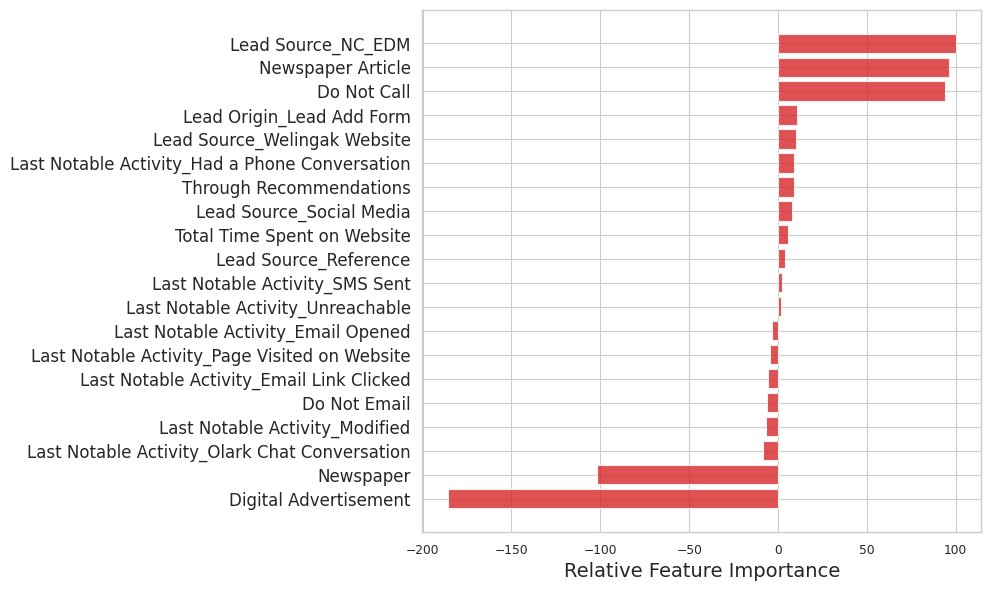

In [475]:
# This code generates a horizontal bar plot to visualize the relative importance of features.
# It calculates positions for the bars, creates a figure with a subplot, plots the feature importance
# values as bars, sets axis labels and ticks, and displays the plot.
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

#### Sorted features with respect to 'Relative Feature Importance'

In [476]:
# Creating a DataFrame to store feature importance values and their corresponding indices, then sorting it in descending order
leads_ri=pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
leads_ri

,index,0
7,Lead Source_NC_EDM,100.00
3,Newspaper Article,96.29
1,Do Not Call,94.01
11,Lead Origin_Lead Add Form,10.73
10,Lead Source_Welingak Website,10.09
14,Last Notable Activity_Had a Phone Conversation,9.16
6,Through Recommendations,8.85
9,Lead Source_Social Media,7.73
2,Total Time Spent on Website,5.79
8,Lead Source_Reference,3.81


#### Selecting Top 4 features which contribute most towards the probability of a lead getting converted:

In [477]:
leads_ri.head(4)

,index,0
7,Lead Source_NC_EDM,100.00
3,Newspaper Article,96.29
1,Do Not Call,94.01
11,Lead Origin_Lead Add Form,10.73


### Conclusion

#### After trying several models, we finally chose a model with the following characteristics:
- All variables have p-value < 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
- The overall accuracy of 0.9056 at a probability threshold of 0.33 on the test dataset is also very acceptable.

###### Model  predicted following values of the dependent variables for respective  threshold values of Conversion probability:

In [478]:
# Dataset Threshhold value    Accuracy   Sensitivity      Specificity   False Postive Rate     Positive         Negative
#                                                                                         predictive value  Predictive Value

# train      0.5               0.9124        0.8195           0.9698           0.03023           0.9435             0.8971

# train      0.33              0.8893        0.9456           0.8545           0.1454            0.8002             0.9622

# test       0.33              0.8946        0.9598           0.8521           0.1478            0.8090             0.9701


#### Based on our model, some features are identified which contribute most to a Lead getting converted successfully.
-  The conversion probability of a lead increases with increase in values of the following features in descending order:
    

Tags_Lost to EINS

Tags_Closed by Horizzon

Tags_Will revert after reading the email

Lead Source_Welingak Website

What is your current occupation_Working Profes...

Last Activity_SMS Sent

What is your current occupation_Unemployed



- The conversion probability of a lead increases with decrease in values of the following features in descending order

Tags_switched off

Tags_Ringing

Tags_Already a student

Tags_Not doing further education

Tags_Interested in full time MBA

Lead Quality_Worst

Tags_Interested in other courses

Tags_opp hangup

Asymmetrique Activity Index_03.Low

-  Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will
decrease or increase the Sensitivity and increase or decrease the Specificity of the model
-  From High Sensitivity  we get that almost all leads who are likely to Convert are correctly predicted.
-  From High Specificity  we get that leads that are on the brink of the probability of getting Converted or not are not selected.